# Project’s title:

# Understanding what demographic factors and features of an order correlate with and best predict a customer of a food-delivery service in Bangalore, India buying again with that very service 

## Dataset’s info

The dataset draws a very comprehensive picture of 338 orders and some characteristics associated with those, namely:

Concerning the order’s customer:

- Age
- Gender
- Marital status
- Occupation
- Monthly income  
- Educational Qualifications
- Family size
- Latitude
- Longitude
- Pin code (area’s postal code)
- Medium (P1) (medium of order that would be the customer’s first choice)
- Medium (P2) (medium of order that would be the customer’s second choice)
- Meal (P1) (meal that would be the customer’s first choice)
- Meal (P2) (meal that would be the customer’s second choice)
- Preference (P1) (cuisine that would be the customer’s first choice)
- Preference (P2) (cuisine that would be the customer’s second choice)
- Ease and convenient (customer’s opinion on the service’s ease and convenience)
- Time Saving (customer’s opinion on the service’s success in saving the customer time)
- More restaurant choices (customer’s opinion on if the service’s depth of restaurant choices plays a part in choosing to buy with that very service)
- Easy payment option (customer’s opinion on if the service’s depth of payment choices plays a part in choosing to buy with that very service)
- More offers and discount (customer’s opinion on if the service’s depth of payment choices plays a part in choosing to buy with that very service)
- Good food quality (customer’s opinion on if the service’s food quality plays a part in choosing to buy with that very service)
- Good tracking system (customer’s opinion on if the service’s tracking system, on the app, following the order as it moves, plays a part in choosing to buy with that very service)
- Self cooking (customer’s opinion on if the order’s necessity to be cooked, after delivery, for it to be consumed causes the customer not to buy with the service)
- Health concern (customer’s opinion on if any health concern related to the order causes the customer not to buy with the service)
- Late delivery (customer’s opinion on if an order delivered late causes the customer not to buy with the service)
- Poor Hygiene (customer’s opinion on if poor hygiene related to the order causes the customer not to buy with the service)
- Bad past experience (customer’s opinion on if bad past experiences with food ordering cause the customer not to buy with the service)
- Unavailability (customer’s opinion on if unavailability to deliver the order causes the customer not to buy with the service)
- Unaffordable (customer’s opinion on if unaffordability of an order causes the customer not to buy with the service)
- Long delivery time (customer’s opinion on if a long delivery time causes the customer to cancel the order)
- Delay of delivery person getting assigned (customer’s opinion on if delay of the delivery person assigned causes the customer to cancel the order)
- Delay of delivery person picking up food (customer’s opinion on if delay of the delivery person picking up food causes the customer to cancel the order)
- Wrong order delivered (customer’s opinion on if a previous wrongly delivered order causes the customer to cancel the order)
- Missing item (customer’s opinion on if a missing item in an order causes the customer to cancel the order)
- Order placed by mistake (customer’s opinion on if a an order placed by mistake causes the customer to cancel the order)
- Influence of time (on any aspect of the order as answered by the customer)
- Order time (the time at which the customer orders)
- Maximum wait time (customer’s answer to ‘How much can you wait for the order?’)
- Residence in busy location
- Google Maps accuracy (customer’s answer to ‘Is your location in Google Maps accurate?’)
- Good road condition (customer’s answer to ‘Is your residence’s area road condition good?’)
- Low quantity low time (customer’s opinion on if the order’s of low quantity and low delivery time)
- Delivery person ability (customer’s opinion on if the delivery person’s ability depends on time of delivery)
- Influence of rating (customer’s answer to ‘Does the restaurant rating influence your decision to buy?’)
- Less delivery time (customer’s opinion on the importance of a lesser delivery time)
- High quality of package (customer’s opinion on the importance of the quality of package)
- Number of calls (customer’s opinion on the importance of the calls made by the delivery captain)
- Politeness (customer’s opinion on the importance of politeness of the delivery captain)
- Freshness (customer’s opinion on the importance of freshness of food)
- Temperature (customer’s opinion on the importance of the food’s temperature)
- Good taste (customer’s opinion on the importance of the food’s good taste)
- Good quantity (customer’s opinion on the importance of the food’s quantity)
- Output (customer’s response of Yes or No to the question ‘Would you buy again with this service?’)
- Reviews (customer’s written feedback)

## Data cleaning

The first step of my analysis was a data cleaning process that included:

- getting rid of missing or null values (which would hinder the machine learning predictive model)
- getting rid of the Reviews column (which I believe would unnecessarily complexify my analysis of understanding what order characteristics would correlate and predict a customer buying again, as I’d have to clusterize and turn an enormous quantity of qualitative information in string form to numerical information while already having an enormity of information to draw from)
- turning all remaining strings to numerical values, to accommodate for further machine learning

## Correlation matrix

That data cleaning process enabled the construction of a correlation matrix which quantifies the 1-on-1 relation of all the features listed above. Of the insights the matrix caters, I’d highlight:

- Ease and convenient, Time saving, More restaurant choices, Easy payment option, More offers and discount, Good food quality, Good tracking system are all highly positively correlated between each other 
- Similarly high positive correlation exists between all the following metrics: Self cooking, Health concern, Late delivery, Poor hygiene, Bad past experience, Unavailability, Unaffordable 

## Machine learning predictor of customers buying again

Then a supervised learning machine learning model was constructed to predict what a particular customer’s response would be to the question “Would you buy again with this service?” considering the order’s characteristics.

The model firstly selected the 5 characteristics - out of all the orders’ characteristics displayed in the dataset - that would best serve its prediction purposes (to eliminate possible noise that could make the prediction not as accurate in the end). 

The 5 chosen features were *Ease and convenient, Late Delivery, Occupation_Student, Medium (P1)_Food delivery apps, Perference(P2)_ Sweets*.

The model built will be able to carry out predictions with the following quality:

- Accuracy: 0.94
- Precision: 0.94
- Recall: 0.98
- F1 Score: 0.96
- Confusion matrix:
	[[ 8  4]
 [ 1 65]]

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = '/Users/goncalolazaro/Downloads/onlinedeliverydata.csv'

pd.set_option('display.max_columns', None)

df = pd.read_csv(file_path)

df.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

          Medium (P1)   Medium (P2)   Meal(P1) Meal(P2)  \
0  Food delivery apps   Web browser  Breakfast    Lunch   
1  Food delivery apps   Web browser     Snacks   Dinner   
2  Food delivery apps   Direct call      Lunch   Snacks   
3  Food delivery apps       Walk-in     Snacks   Dinner   
4             Walk-in   Direct call      Lunch   Dinner   

                           Perference(P1)  \
0          Non Veg foods (Lunch / Dinner)   
1          Non Veg foods (Lunch / Dinner)   
2          Non Veg foods (Lunch / Dinner)   
3  Veg foods (Breakfast / Lunch / Dinner)   
4          Non Veg foods (Lunch / Dinner)   

                            Perference(P2) Ease and convenient  \
0                    Bakery items (snacks)             Neutral   
1   Veg foods (Breakfast / Lunch / Dinner)      Strongly agree   
2                  Ice cream / Cool drinks      Strongly agree   
3                    Bakery items (snacks)               Agree   
4   Veg foods (Breakfast / Lunch / Dinner)               Agree   

      Time saving More restaurant choices Easy Payment option  \
0         Neutral                 Neutral             Neutral   
1  Strongly agree          Strongly agree      Strongly agree   
2  Strongly agree          Strongly agree             Neutral   
3           Agree          Strongly agree               Agree   
4           Agree                   Agree               Agree   

  More Offers and Discount Good Food quality Good Tracking system  \
0                  Neutral           Neutral              Neutral   
1           Strongly agree           Neutral                Agree   
2                  Neutral          Disagree              Neutral   
3           Strongly agree             Agree                Agree   
4                    Agree           Neutral              Neutral   

     Self Cooking  Health Concern   Late Delivery    Poor Hygiene  \
0         Neutral         Neutral         Neutral         Neutral   
1  Strongly agree  Strongly agree           Agree  Strongly agree   
2        Disagree         Neutral         Neutral           Agree   
3           Agree  Strongly agree         Neutral           Agree   
4           Agree  Strongly agree  Strongly agree           Agree   

  Bad past experience  Unavailability    Unaffordable Long delivery time  \
0             Neutral         Neutral         Neutral              Agree   
1      Strongly agree  Strongly agree  Strongly agree     Strongly agree   
2               Agree           Agree           Agree              Agree   
3            Disagree        Disagree         Neutral              Agree   
4      Strongly agree           Agree        Disagree     Strongly agree   

  Delay of delivery person getting assigned  \
0                                     Agree   
1                            Strongly agree   
2                                     Agree   
3                                     Agree   
4                            Strongly agree   

  Delay of delivery person picking up food Wrong order delivered  \
0                                    Agree                 Agree   
1                           Strongly agree        Strongly agree 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [4]:
# Checking for missing values in the dataset:

nan_values = df.isna()

any_missing_values = nan_values.any()

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)


Missing Values in the Entire DataFrame?
Age                                          False
Gender                                       False
Marital Status                               False
Occupation                                   False
Monthly Income                               False
Educational Qualifications                   False
Family size                                  False
latitude                                     False
longitude                                    False
Pin code                                     False
Medium (P1)                                  False
Medium (P2)                                  False
Meal(P1)                                     False
Meal(P2)                                     False
Perference(P1)                               False
Perference(P2)                               False
Ease and convenient                          False
Time saving                                  False
More restaurant choices                  

In [5]:
# Adding a unique_id column (it's a good thing to do for possible upcoming machine learning and lookup purposes):

df.reset_index(inplace=True)

df.rename(columns={'index': 'order_id'}, inplace=True)

df.head()

order_id  Age  Gender Marital Status Occupation  Monthly Income  \
0         0   20  Female         Single    Student       No Income   
1         1   24  Female         Single    Student  Below Rs.10000   
2         2   22    Male         Single    Student  Below Rs.10000   
3         3   22  Female         Single    Student       No Income   
4         4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

          Medium (P1)   Medium (P2)   Meal(P1) Meal(P2)  \
0  Food delivery apps   Web browser  Breakfast    Lunch   
1  Food delivery apps   Web browser     Snacks   Dinner   
2  Food delivery apps   Direct call      Lunch   Snacks   
3  Food delivery apps       Walk-in     Snacks   Dinner   
4             Walk-in   Direct call      Lunch   Dinner   

                           Perference(P1)  \
0          Non Veg foods (Lunch / Dinner)   
1          Non Veg foods (Lunch / Dinner)   
2          Non Veg foods (Lunch / Dinner)   
3  Veg foods (Breakfast / Lunch / Dinner)   
4          Non Veg foods (Lunch / Dinner)   

                            Perference(P2) Ease and convenient  \
0                    Bakery items (snacks)             Neutral   
1   Veg foods (Breakfast / Lunch / Dinner)      Strongly agree   
2                  Ice cream / Cool drinks      Strongly agree   
3                    Bakery items (snacks)               Agree   
4   Veg foods (Breakfast / Lunch / Dinner)               Agree   

      Time saving More restaurant choices Easy Payment option  \
0         Neutral                 Neutral             Neutral   
1  Strongly agree          Strongly agree      Strongly agree   
2  Strongly agree          Strongly agree             Neutral   
3           Agree          Strongly agree               Agree   
4           Agree                   Agree               Agree   

  More Offers and Discount Good Food quality Good Tracking system  \
0                  Neutral           Neutral              Neutral   
1           Strongly agree           Neutral                Agree   
2                  Neutral          Disagree              Neutral   
3           Strongly agree             Agree                Agree   
4                    Agree           Neutral              Neutral   

     Self Cooking  Health Concern   Late Delivery    Poor Hygiene  \
0         Neutral         Neutral         Neutral         Neutral   
1  Strongly agree  Strongly agree           Agree  Strongly agree   
2        Disagree         Neutral         Neutral           Agree   
3           Agree  Strongly agree         Neutral           Agree   
4           Agree  Strongly agree  Strongly agree           Agree   

  Bad past experience  Unavailability    Unaffordable Long delivery time  \
0             Neutral         Neutral         Neutral              Agree   
1      Strongly agree  Strongly agree  Strongly agree     Strongly agree   
2               Agree           Agree           Agree              Agree   
3            Disagree        Disagree         Neutral              Agree   
4      Strongly agree           Agree        Disagree     Strongly agree   

  Delay of delivery person getting assigned  \
0                                     Agree   
1                            Strongly agree   
2                                     Agree   
3                                     Agree   
4                            Strongly agree   

  Delay of delivery person picking up food Wrong order delivered  \
0                                    Agree                 Agree   
1    

In [6]:
df.describe()

order_id         Age  Family size    latitude   longitude  \
count  388.000000  388.000000   388.000000  388.000000  388.000000   
mean   193.500000   24.628866     3.280928   12.972058   77.600160   
std    112.150197    2.975593     1.351025    0.044489    0.051354   
min      0.000000   18.000000     1.000000   12.865200   77.484200   
25%     96.750000   23.000000     2.000000   12.936900   77.565275   
50%    193.500000   24.000000     3.000000   12.977000   77.592100   
75%    290.250000   26.000000     4.000000   12.997025   77.630900   
max    387.000000   33.000000     6.000000   13.102000   77.758200   

            Pin code  
count     388.000000  
mean   560040.113402  
std        31.399609  
min    560001.000000  
25%    560010.750000  
50%    560033.500000  
75%    560068.000000  
max    560109.000000

In [7]:
# Now we turn the values inside the 'Output' column into 0s and 1s (instead of Nos and Yeses) to allow for a wider range of analyses:

df['Output'] = df['Output'].map({'Yes': 1, 'No': 0})
df['Output'] = df['Output'].astype(float)

print(df.head())

   order_id  Age  Gender Marital Status Occupation  Monthly Income  \
0         0   20  Female         Single    Student       No Income   
1         1   24  Female         Single    Student  Below Rs.10000   
2         2   22    Male         Single    Student  Below Rs.10000   
3         3   22  Female         Single    Student       No Income   
4         4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

          Medium (P1)   Medium (P2)   Meal(P1) Meal(P2)  \
0  Food delivery apps   Web browser  Breakfast    Lunch   
1  F

In [8]:
# Drop the 'Reviews' column, which has NaN values (which may disrupt further analyses).
# We're deleting it because we won't use it anyways and that's simpler than re-formatting the NaN values in the column.

df = df.drop('Reviews', axis=1)

df.head()

order_id  Age  Gender Marital Status Occupation  Monthly Income  \
0         0   20  Female         Single    Student       No Income   
1         1   24  Female         Single    Student  Below Rs.10000   
2         2   22    Male         Single    Student  Below Rs.10000   
3         3   22  Female         Single    Student       No Income   
4         4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

          Medium (P1)   Medium (P2)   Meal(P1) Meal(P2)  \
0  Food delivery apps   Web browser  Breakfast    Lunch   
1  Food delivery apps   Web browser     Snacks   Dinner   
2  Food delivery apps   Direct call      Lunch   Snacks   
3  Food delivery apps       Walk-in     Snacks   Dinner   
4             Walk-in   Direct call      Lunch   Dinner   

                           Perference(P1)  \
0          Non Veg foods (Lunch / Dinner)   
1          Non Veg foods (Lunch / Dinner)   
2          Non Veg foods (Lunch / Dinner)   
3  Veg foods (Breakfast / Lunch / Dinner)   
4          Non Veg foods (Lunch / Dinner)   

                            Perference(P2) Ease and convenient  \
0                    Bakery items (snacks)             Neutral   
1   Veg foods (Breakfast / Lunch / Dinner)      Strongly agree   
2                  Ice cream / Cool drinks      Strongly agree   
3                    Bakery items (snacks)               Agree   
4   Veg foods (Breakfast / Lunch / Dinner)               Agree   

      Time saving More restaurant choices Easy Payment option  \
0         Neutral                 Neutral             Neutral   
1  Strongly agree          Strongly agree      Strongly agree   
2  Strongly agree          Strongly agree             Neutral   
3           Agree          Strongly agree               Agree   
4           Agree                   Agree               Agree   

  More Offers and Discount Good Food quality Good Tracking system  \
0                  Neutral           Neutral              Neutral   
1           Strongly agree           Neutral                Agree   
2                  Neutral          Disagree              Neutral   
3           Strongly agree             Agree                Agree   
4                    Agree           Neutral              Neutral   

     Self Cooking  Health Concern   Late Delivery    Poor Hygiene  \
0         Neutral         Neutral         Neutral         Neutral   
1  Strongly agree  Strongly agree           Agree  Strongly agree   
2        Disagree         Neutral         Neutral           Agree   
3           Agree  Strongly agree         Neutral           Agree   
4           Agree  Strongly agree  Strongly agree           Agree   

  Bad past experience  Unavailability    Unaffordable Long delivery time  \
0             Neutral         Neutral         Neutral              Agree   
1      Strongly agree  Strongly agree  Strongly agree     Strongly agree   
2               Agree           Agree           Agree              Agree   
3            Disagree        Disagree         Neutral              Agree   
4      Strongly agree           Agree        Disagree     Strongly agree   

  Delay of delivery person getting assigned  \
0                                     Agree   
1                            Strongly agree   
2                                     Agree   
3                                     Agree   
4                            Strongly agree   

  Delay of delivery person picking up food Wrong order delivered  \
0                                    Agree                 Agree   
1    

In [9]:
# We'll do one-hot encoding on the qualitative (categorical) variables that, on a per column basis, hold no ranking between themselves. This is for machine learning purposes.

new_df = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Order Time'], prefix=['Gender', 'Marital Status', 'Occupation', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Order Time'])

new_df.head()

order_id  Age  Monthly Income Educational Qualifications  Family size  \
0         0   20       No Income              Post Graduate            4   
1         1   24  Below Rs.10000                   Graduate            3   
2         2   22  Below Rs.10000              Post Graduate            3   
3         3   22       No Income                   Graduate            6   
4         4   22  Below Rs.10000              Post Graduate            4   

   latitude  longitude  Pin code Ease and convenient     Time saving  \
0   12.9766    77.5993    560001             Neutral         Neutral   
1   12.9770    77.5773    560009      Strongly agree  Strongly agree   
2   12.9551    77.6593    560017      Strongly agree  Strongly agree   
3   12.9473    77.5616    560019               Agree           Agree   
4   12.9850    77.5533    560010               Agree           Agree   

  More restaurant choices Easy Payment option More Offers and Discount  \
0                 Neutral             Neutral                  Neutral   
1          Strongly agree      Strongly agree           Strongly agree   
2          Strongly agree             Neutral                  Neutral   
3          Strongly agree               Agree           Strongly agree   
4                   Agree               Agree                    Agree   

  Good Food quality Good Tracking system    Self Cooking  Health Concern  \
0           Neutral              Neutral         Neutral         Neutral   
1           Neutral                Agree  Strongly agree  Strongly agree   
2          Disagree              Neutral        Disagree         Neutral   
3             Agree                Agree           Agree  Strongly agree   
4           Neutral              Neutral           Agree  Strongly agree   

    Late Delivery    Poor Hygiene Bad past experience  Unavailability  \
0         Neutral         Neutral             Neutral         Neutral   
1           Agree  Strongly agree      Strongly agree  Strongly agree   
2         Neutral           Agree               Agree           Agree   
3         Neutral           Agree            Disagree        Disagree   
4  Strongly agree           Agree      Strongly agree           Agree   

     Unaffordable Long delivery time  \
0         Neutral              Agree   
1  Strongly agree     Strongly agree   
2           Agree              Agree   
3         Neutral              Agree   
4        Disagree     Strongly agree   

  Delay of delivery person getting assigned  \
0                                     Agree   
1                            Strongly agree   
2                                     Agree   
3                                     Agree   
4                            Strongly agree   

  Delay of delivery person picking up food Wrong order delivered  \
0                                    Agree                 Agree   
1                           Strongly agree        Strongly agree   
2                                    Agree        Strongly agree   
3                                    Agree              Disagree   
4                                  Neutral               Neutral   

     Missing item Order placed by mistake Influence of time Maximum wait time  \
0           Agree                   Agree               Yes        30 minutes   
1  Strongly agree          Strongly agree               Yes        30 minutes   
2           Agree                 Neutral               Yes        45 minutes   
3        Disagree                 Neutral               Yes        30 minutes   
4         Neutral                Disagree               Yes        30 minutes   

  Residence in busy location Google Maps Accuracy Good Road Condition  \
0                      Agree              Neutral             Neutral   
1             Strongly Agree              Neutral            Disagree   
2                      Agree       Strongly Agree             Neutral   
3                   Disagree                Agree           

In [10]:
# Turning the 'True' and 'False' values of the newly formed columns into 1's and 0's (respectively) which then enables machine learning features:

binary_columns=['Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Prefer not to say', 'Marital Status_Single', 'Occupation_Employee', 'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 'Medium (P1)_Direct call', 'Medium (P1)_Food delivery apps', 'Medium (P1)_Walk-in', 'Medium (P1)_Web browser', 'Medium (P2)_ Direct call', 'Medium (P2)_ Walk-in', 'Medium (P2)_ Web browser', 'Meal(P1)_Breakfast', 'Meal(P1)_Dinner', 'Meal(P1)_Lunch', 'Meal(P1)_Snacks', 'Meal(P2)_ Dinner', 'Meal(P2)_ Lunch', 'Meal(P2)_ Snacks', 'Perference(P1)_Bakery items (snacks)', 'Perference(P1)_Non Veg foods (Lunch / Dinner)', 'Perference(P1)_Sweets', 'Perference(P1)_Veg foods (Breakfast / Lunch / Dinner)', 'Perference(P2)_ Bakery items (snacks)', 'Perference(P2)_ Ice cream / Cool drinks', 'Perference(P2)_ Sweets', 'Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner)', 'Order Time_Anytime (Mon-Sun)', 'Order Time_Weekdays (Mon-Fri)', 'Order Time_Weekend (Sat & Sun)']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

for column in binary_columns:
    new_df[column] = new_df[column].astype(float) 
print(new_df.head())

   order_id  Age  Monthly Income Educational Qualifications  Family size  \
0         0   20       No Income              Post Graduate            4   
1         1   24  Below Rs.10000                   Graduate            3   
2         2   22  Below Rs.10000              Post Graduate            3   
3         3   22       No Income                   Graduate            6   
4         4   22  Below Rs.10000              Post Graduate            4   

   latitude  longitude  Pin code Ease and convenient     Time saving  \
0   12.9766    77.5993    560001             Neutral         Neutral   
1   12.9770    77.5773    560009      Strongly agree  Strongly agree   
2   12.9551    77.6593    560017      Strongly agree  Strongly agree   
3   12.9473    77.5616    560019               Agree           Agree   
4   12.9850    77.5533    560010               Agree           Agree   

  More restaurant choices Easy Payment option More Offers and Discount  \
0                 Neutral           

In [11]:
demographic_columns = [
    'Age', 
    'Family size', 
    'Gender_Female', 
    'Gender_Male', 
    'Marital Status_Married', 
    'Marital Status_Prefer not to say', 
    'Marital Status_Single', 
    'Occupation_Employee', 
    'Occupation_House wife', 
    'Occupation_Self Employeed', 
    'Occupation_Student', 
    'Monthly Income', 
    'Educational Qualifications'
]

features_of_interest = [
    'Ease and convenient', 
    'Time saving', 
    'More restaurant choices', 
    'Easy Payment option', 
    'More Offers and Discount', 
    'Good Food quality', 
    'Good Tracking system', 
    'Self Cooking',
    'Health Concern', 
    'Late Delivery', 
    'Poor Hygiene', 
    'Bad past experience', 
    'Unavailability', 
    'Unaffordable', 
    'Long delivery time',
    'Delay of delivery person getting assigned',
    'Delay of delivery person picking up food',
    'Wrong order delivered',
    'Missing item',
    'Order placed by mistake',
    'Residence in busy location',
    'Google Maps Accuracy',
    'Good Road Condition',
    'Low quantity low time',
    'Influence of time',
    'Maximum wait time',
    'Influence of rating',
    'Less Delivery time',
    'High Quality of package',
    'Number of calls',
    'Politeness',
    'Freshness ',
    'Temperature',
    'Good Taste ',
    'Good Quantity',
    'Delivery person ability',
    'Meal(P1)_Breakfast', 
    'Meal(P1)_Dinner', 
    'Meal(P1)_Lunch', 
    'Meal(P1)_Snacks', 
    'Perference(P1)_Bakery items (snacks)', 
    'Perference(P1)_Non Veg foods (Lunch / Dinner)', 
    'Perference(P1)_Sweets', 
    'Perference(P1)_Veg foods (Breakfast / Lunch / Dinner)',
    'Order Time_Anytime (Mon-Sun)',
    'Order Time_Weekdays (Mon-Fri)',
    'Order Time_Weekend (Sat & Sun)'
]

In [12]:
# We want to turn the columns which are populated by rows with strings like ['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree'] to numerical values.
# This will enables us to make correlations, further on, using those columns (which we couldn't do if the columns were populated by strings instead).

# Define a mapping for the categorical values to numerical scales
mapping = {
    'Strongly disagree': -2, 'Strongly Disagree': -2, 'Disagree': -1, 'Neutral': 0, 'Agree': 1, 'Strongly Agree': 2, 'Strongly agree': 2,
    'Yes': 2, 'No': 0, 'Maybe': 1,
    'Unimportant': 0, 'Slightly Important': 1, 'Important': 2, 'Moderately Important': 3, 'Very Important': 4,
    '15 minutes': 0, '30 minutes': 1, '45 minutes': 2, '60 minutes': 3, 'More than 60 minutes': 4,
    'No Income': 0, 'Below Rs.10000': 1, '10001 to 25000': 2, '25001 to 50000': 3, 'More than 50000': 4,
    'Uneducated': 0, 'School': 1, 'Graduate': 2, 'Post Graduate': 3, 'Ph.D': 4
}
    

# Columns with non-numeric data
non_numeric_columns = [
    'Ease and convenient', 'Time saving', 'More restaurant choices', 
    'Easy Payment option', 'More Offers and Discount', 'Good Food quality', 
    'Good Tracking system', 'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene', 
    'Bad past experience', 'Unavailability', 'Unaffordable', 'Long delivery time', 
    'Delay of delivery person getting assigned',
    'Delay of delivery person picking up food',
    'Wrong order delivered',
    'Missing item',
    'Order placed by mistake',
    'Residence in busy location',
    'Google Maps Accuracy',
    'Good Road Condition',
    'Low quantity low time',
    'Delivery person ability',
    'Influence of time',
    'Maximum wait time',
    'Influence of rating',
    'Less Delivery time',
    'High Quality of package',
    'Number of calls',
    'Politeness',
    'Freshness ',
    'Temperature',
    'Good Taste ',
    'Good Quantity',
    'Monthly Income',
    'Educational Qualifications'
]

# Apply the mapping to the non-numeric columns in correlation_df
for col in non_numeric_columns:
    new_df[col] = new_df[col].map(mapping)

new_df.head()

order_id  Age  Monthly Income  Educational Qualifications  Family size  \
0         0   20               0                           3            4   
1         1   24               1                           2            3   
2         2   22               1                           3            3   
3         3   22               0                           2            6   
4         4   22               1                           3            4   

   latitude  longitude  Pin code  Ease and convenient  Time saving  \
0   12.9766    77.5993    560001                    0            0   
1   12.9770    77.5773    560009                    2            2   
2   12.9551    77.6593    560017                    2            2   
3   12.9473    77.5616    560019                    1            1   
4   12.9850    77.5533    560010                    1            1   

   More restaurant choices  Easy Payment option  More Offers and Discount  \
0                        0                    0                         0   
1                        2                    2                         2   
2                        2                    0                         0   
3                        2                    1                         2   
4                        1                    1                         1   

   Good Food quality  Good Tracking system  Self Cooking  Health Concern  \
0                  0                     0             0               0   
1                  0                     1             2               2   
2                 -1                     0            -1               0   
3                  1                     1             1               2   
4                  0                     0             1               2   

   Late Delivery  Poor Hygiene  Bad past experience  Unavailability  \
0              0             0                    0               0   
1              1             2                    2               2   
2              0             1                    1               1   
3              0             1                   -1              -1   
4              2             1                    2               1   

   Unaffordable  Long delivery time  \
0             0                   1   
1             2                   2   
2             1                   1   
3             0                   1   
4            -1                   2   

   Delay of delivery person getting assigned  \
0                                          1   
1                                          2   
2                                          1   
3                                          1   
4                                          2   

   Delay of delivery person picking up food  Wrong order delivered  \
0                                         1                      1   
1                                         2                      2   
2                                         1                      2   
3                                         1                     -1   
4                                         0                      0   

   Missing item  Order placed by mistake  Influence of time  \
0             1                        1                  2   
1             2                        2                  2   
2             1                        0                  2   
3            -1                        0                  2   
4             0                       -1                  2   

   Maximum wait time  Residence in busy location  Google Maps Accuracy  \
0                  1                           1                     0   
1                  1                           2                     0   
2                  2                           1                     2   
3                  1                          -1                     1   
4                  1                           1                     1   

   

/var/folders/tl/0f7z6w712nvdfy5v1rdvdylh0000gn/T/ipykernel_79376/595401761.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i)


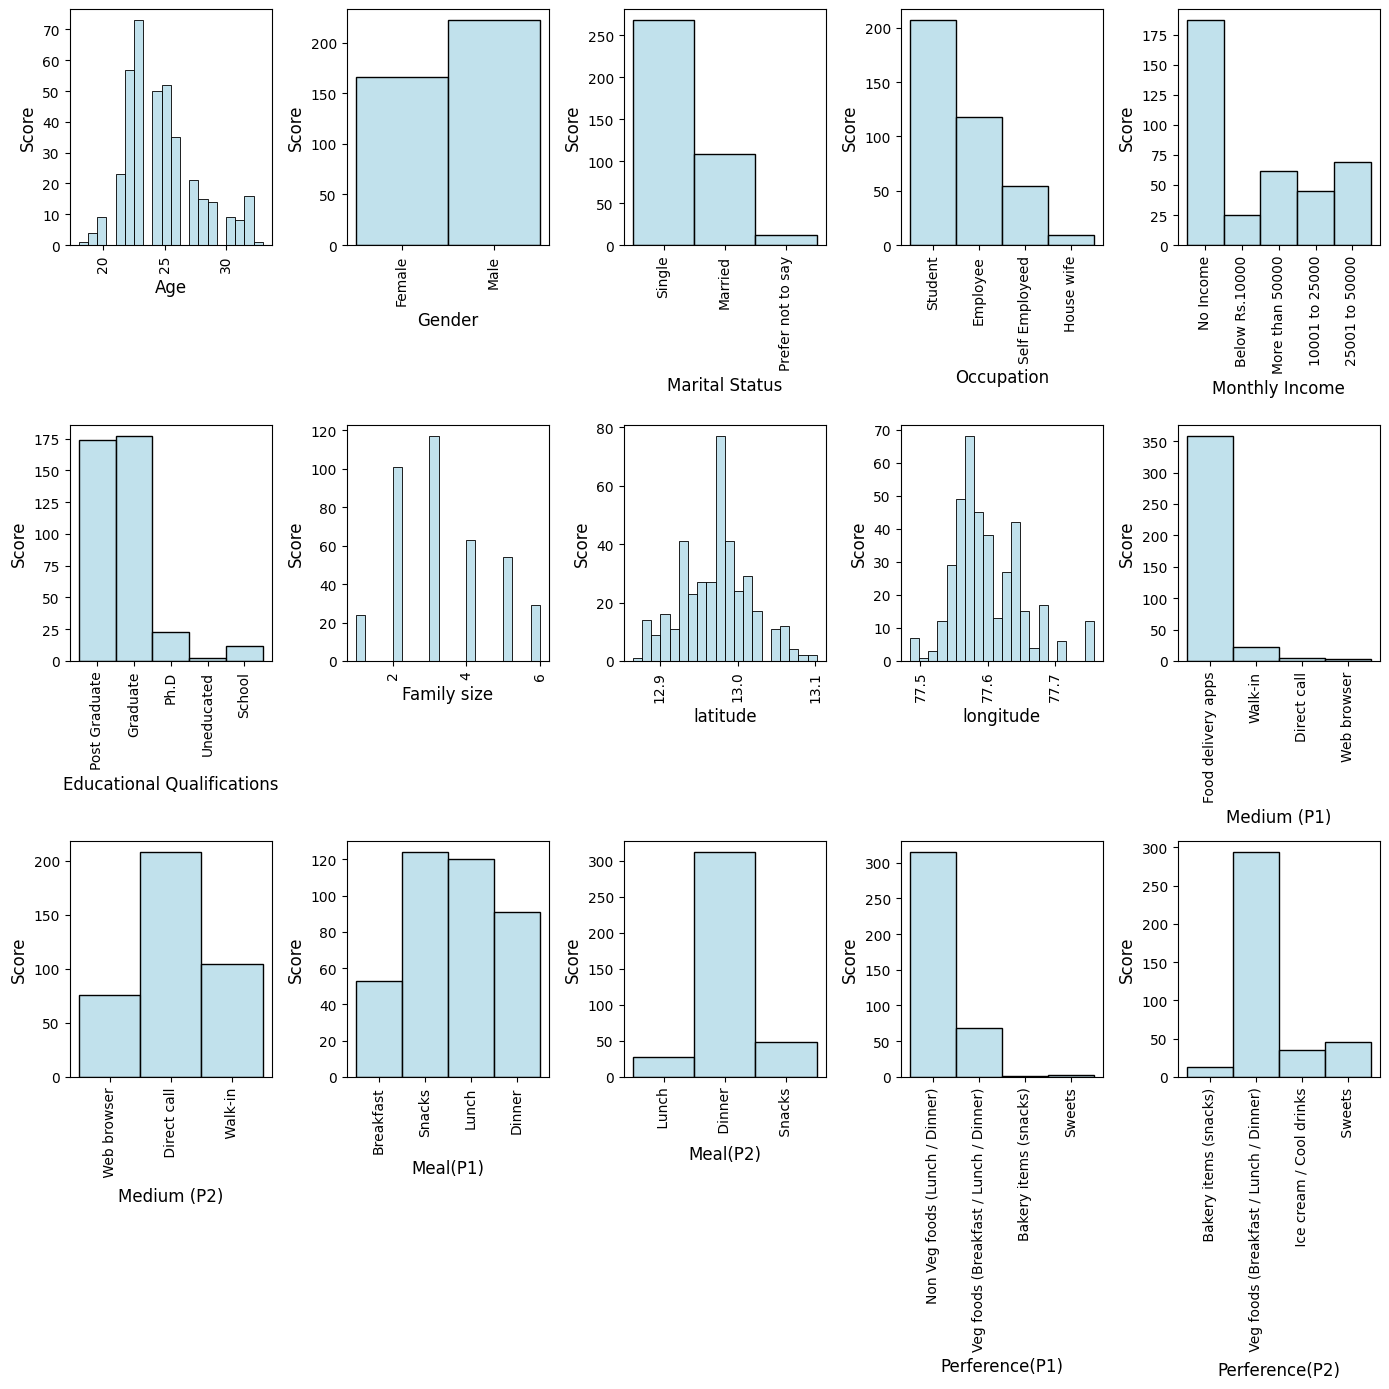

In [13]:
# We see what are the types of variables inside each of the columns that are more frequently featured on the dataset

columns_to_plot = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 'longitude', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)']

fig = plt.subplots(figsize=(14, 14))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data=df, x=column, bins=20, color='lightblue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Insights from the histograms above:

- Age: there is a high concentration of orders from people aged in their early to mid-20s & our whole sample is aged between 18 y.o. and 40 y.o.
- Gender: there are more men than women's orders in the dataset
- Marital Status: the great majority of orders featured on the dataset come from people with a single marital status
- Occupation: the majority of orders in the dataset come from students and employees
- Monthly income: the most-represented category in this cluster is 'No income' which makes sense considering the most-represented occupation is student
- Educational Qualifications: Graduate and post-graduate are the most-represented categories
- Family size: almost all of the orders in the dataset come from people with families of 2 or more
- Medium (P1) & Medium (P2): for P1 the clear preference indicated by the people whose orders are on the dataset is 'food delivery apps' for P2 the preference is more widely distributed
- Meal (P1) & Meal (P2): for P1, preferences are widely distributed by the available categories wheres in P2 dinner's the clear winner
- Perference (P1) & Perference (P2): non veg foods take the clear lead in P1, veg foods take the clear lead in P2

In [63]:
# Pie charts depicting how the dataset's characteristics affect 'Output':

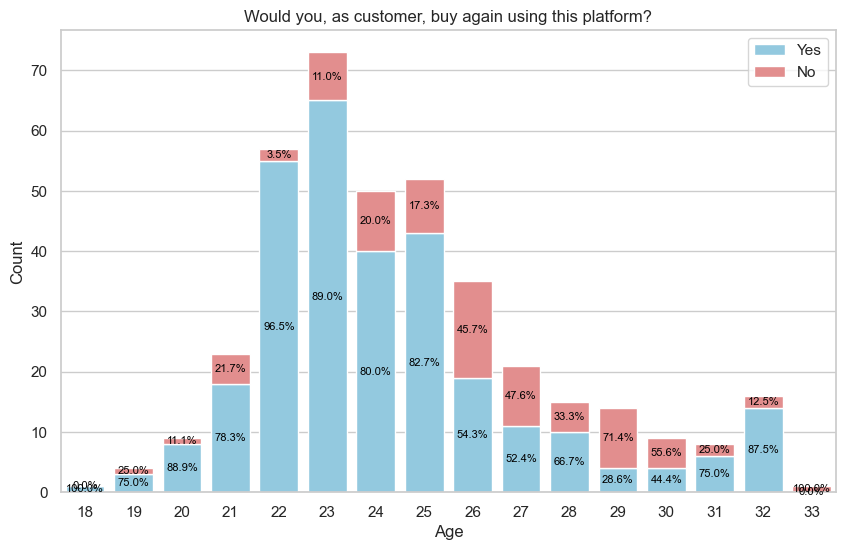

Output  0.0  1.0
Age             
18        0    1
19        1    3
20        1    8
21        5   18
22        2   55
23        8   65
24       10   40
25        9   43
26       16   19
27       10   11
28        5   10
29       10    4
30        5    4
31        2    6
32        2   14
33        1    0


In [14]:
# Column chart relating Age with Output:

pivot_df = new_df.pivot_table(index='Age', columns='Output', aggfunc='size', fill_value=0)

percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Would you, as customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- The overwhelming majority of customers, particularly those 25 y.o. and below, would buy with this platform again
- Indeed, 87% of customers of 25 y.o. and below would buy again with this platform
- On the other hand, only 57% of customers of 26 y.o. and above would buy again with this platform 
- The platform needs to find a way of improving its performance in retaining customers aged 26 y.o. and above

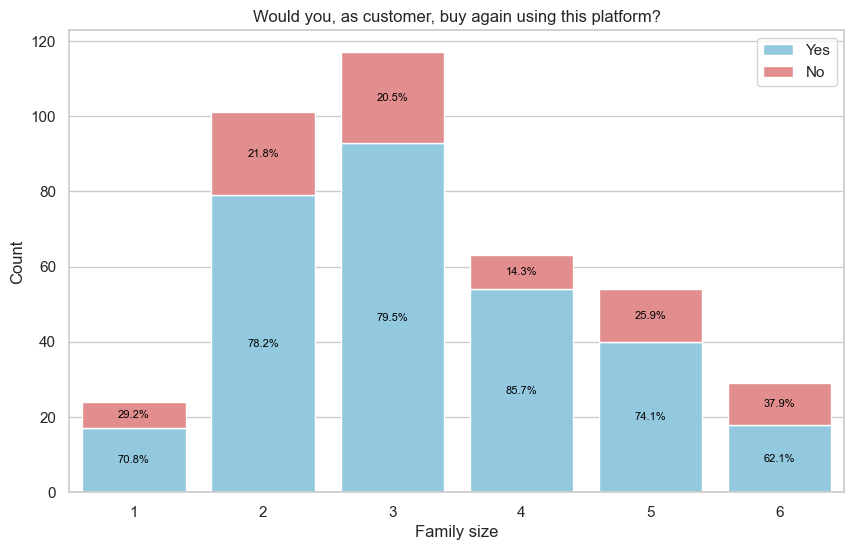

Output       0.0  1.0
Family size          
1              7   17
2             22   79
3             24   93
4              9   54
5             14   40
6             11   18


In [15]:
# Column chart relating Family Size with Output:

pivot_df = new_df.pivot_table(index='Family size', columns='Output', aggfunc='size', fill_value=0)

percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Family size')
plt.ylabel('Count')
plt.title('Would you, as customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- Unlike what we saw with Age, there doesn't seem to be a clear partition of how customers respond to the question "would you buy again in this platform"
- Indeed, 78% of customers from families of 1 through 3 people responded 'Yes', against a 77% figure from the remaining customers

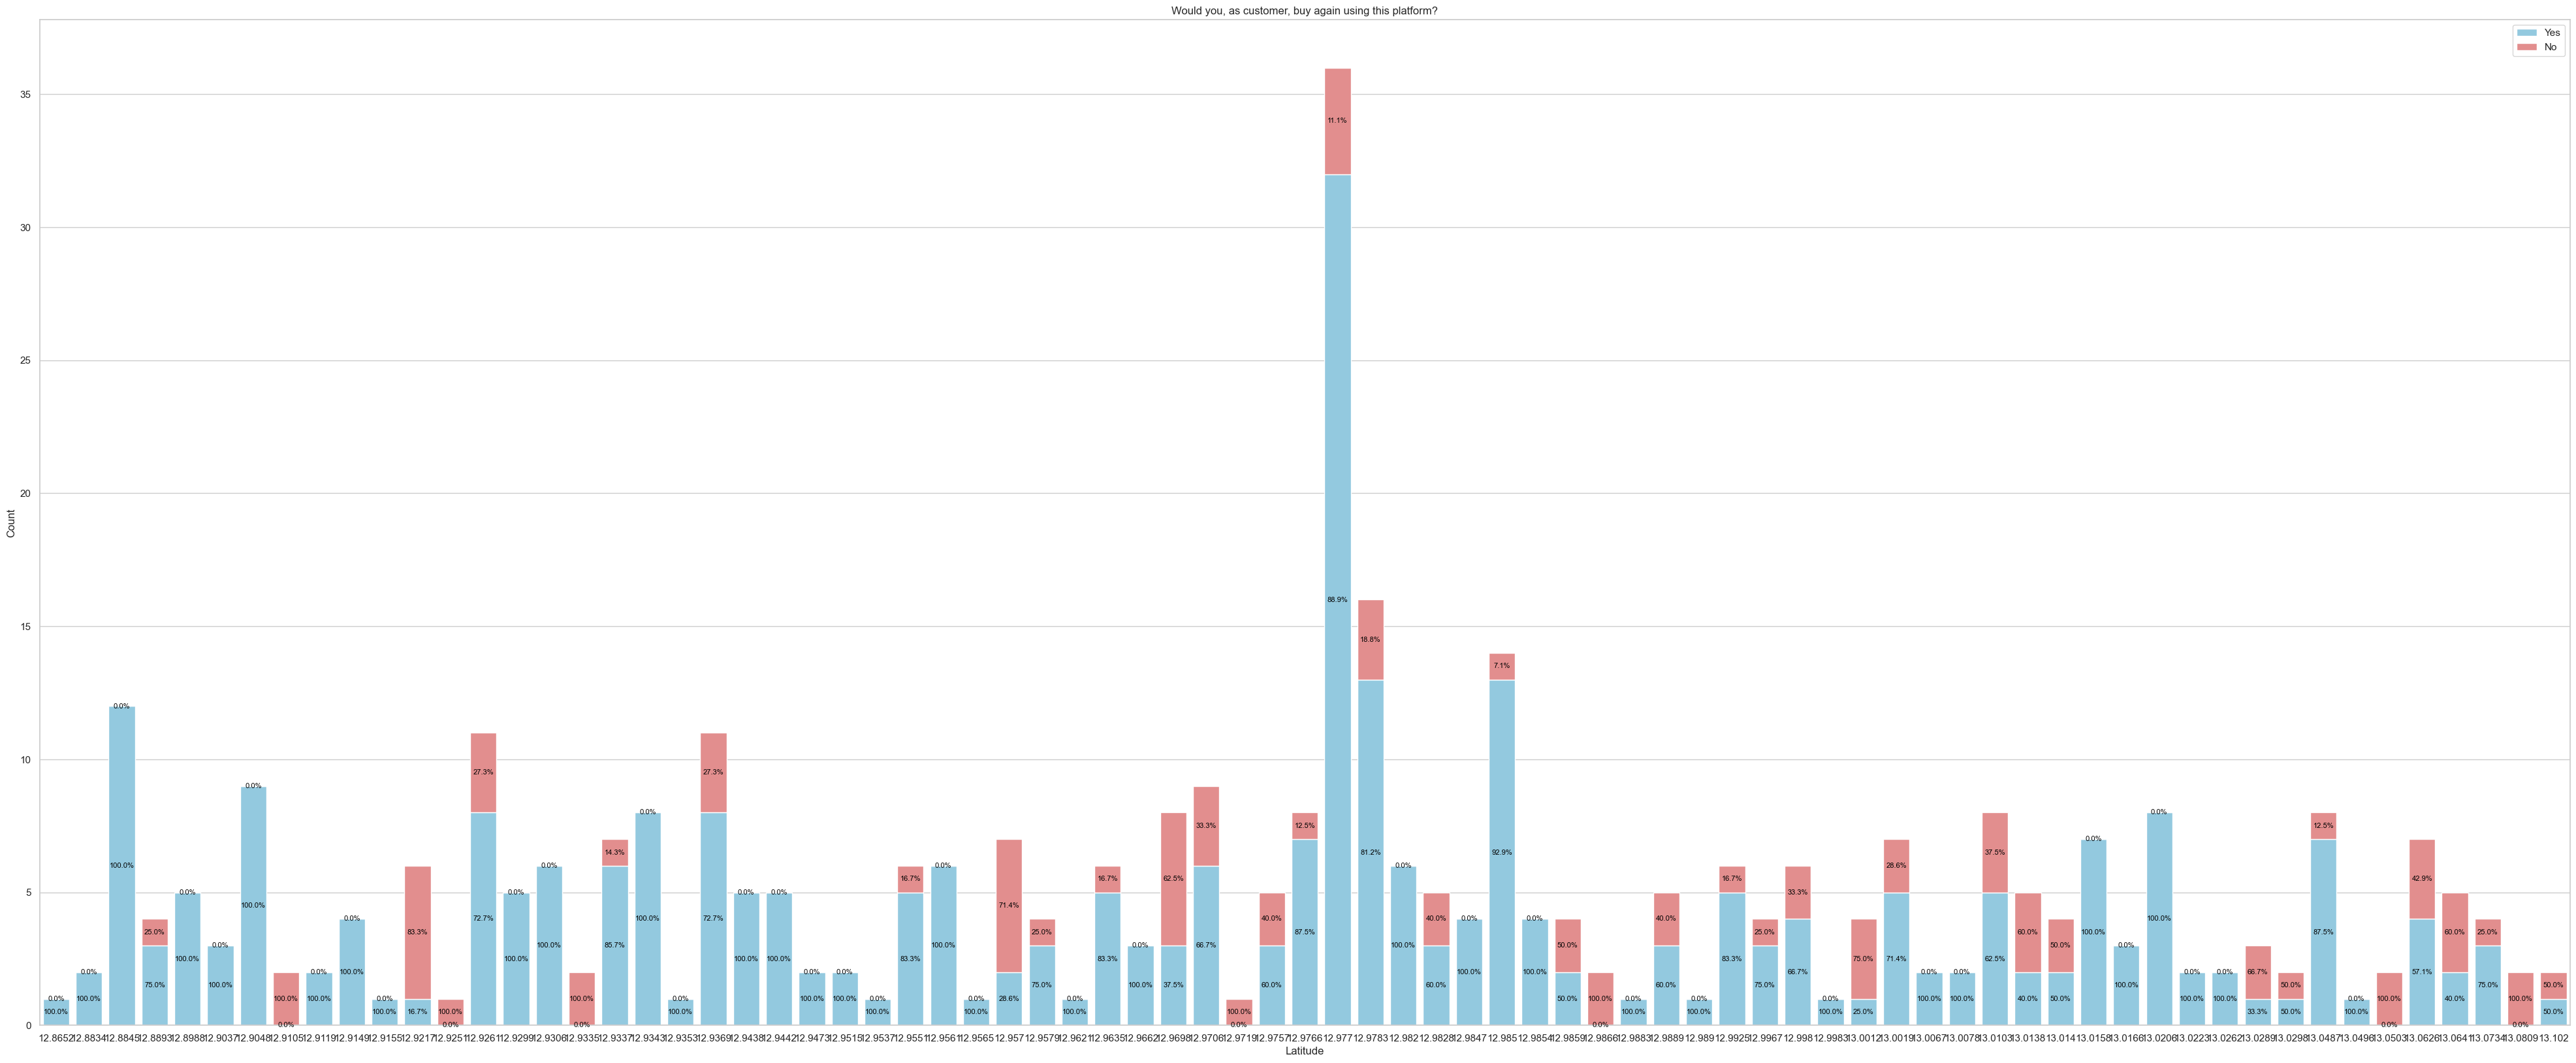

Output    0.0  1.0
latitude          
12.8652     0    1
12.8834     0    2
12.8845     0   12
12.8893     1    3
12.8988     0    5
...       ...  ...
13.0626     3    4
13.0641     3    2
13.0734     1    3
13.0809     2    0
13.1020     1    1

[77 rows x 2 columns]


In [16]:
# Column chart relating Latitude with Output:

pivot_df = new_df.pivot_table(index='latitude', columns='Output', aggfunc='size', fill_value=0)

percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(50, 20))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Latitude')
plt.ylabel('Count')
plt.title('Would you, as customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

In [133]:
pivot_df.to_csv("/Users/goncalolazaro/Desktop/latitude.csv")

# Conclusions to take off of the chart above:

- As the latitudes increase, there is a clear drop in the % of customers that self-identify as ones that would buy again using the platform the dataset refers to
- Indeed, the 26 lowest-latitude places combine for a 85% of customers that would buy again
- The next-highest 26 latitudes combine for a 78% of customers that would buy again
- And the highest batch of 25 latitudes combine for a mere 68% of customers that would buy again
- The platform needs to figure out how to improve its retaining of customers in higher-latitudes

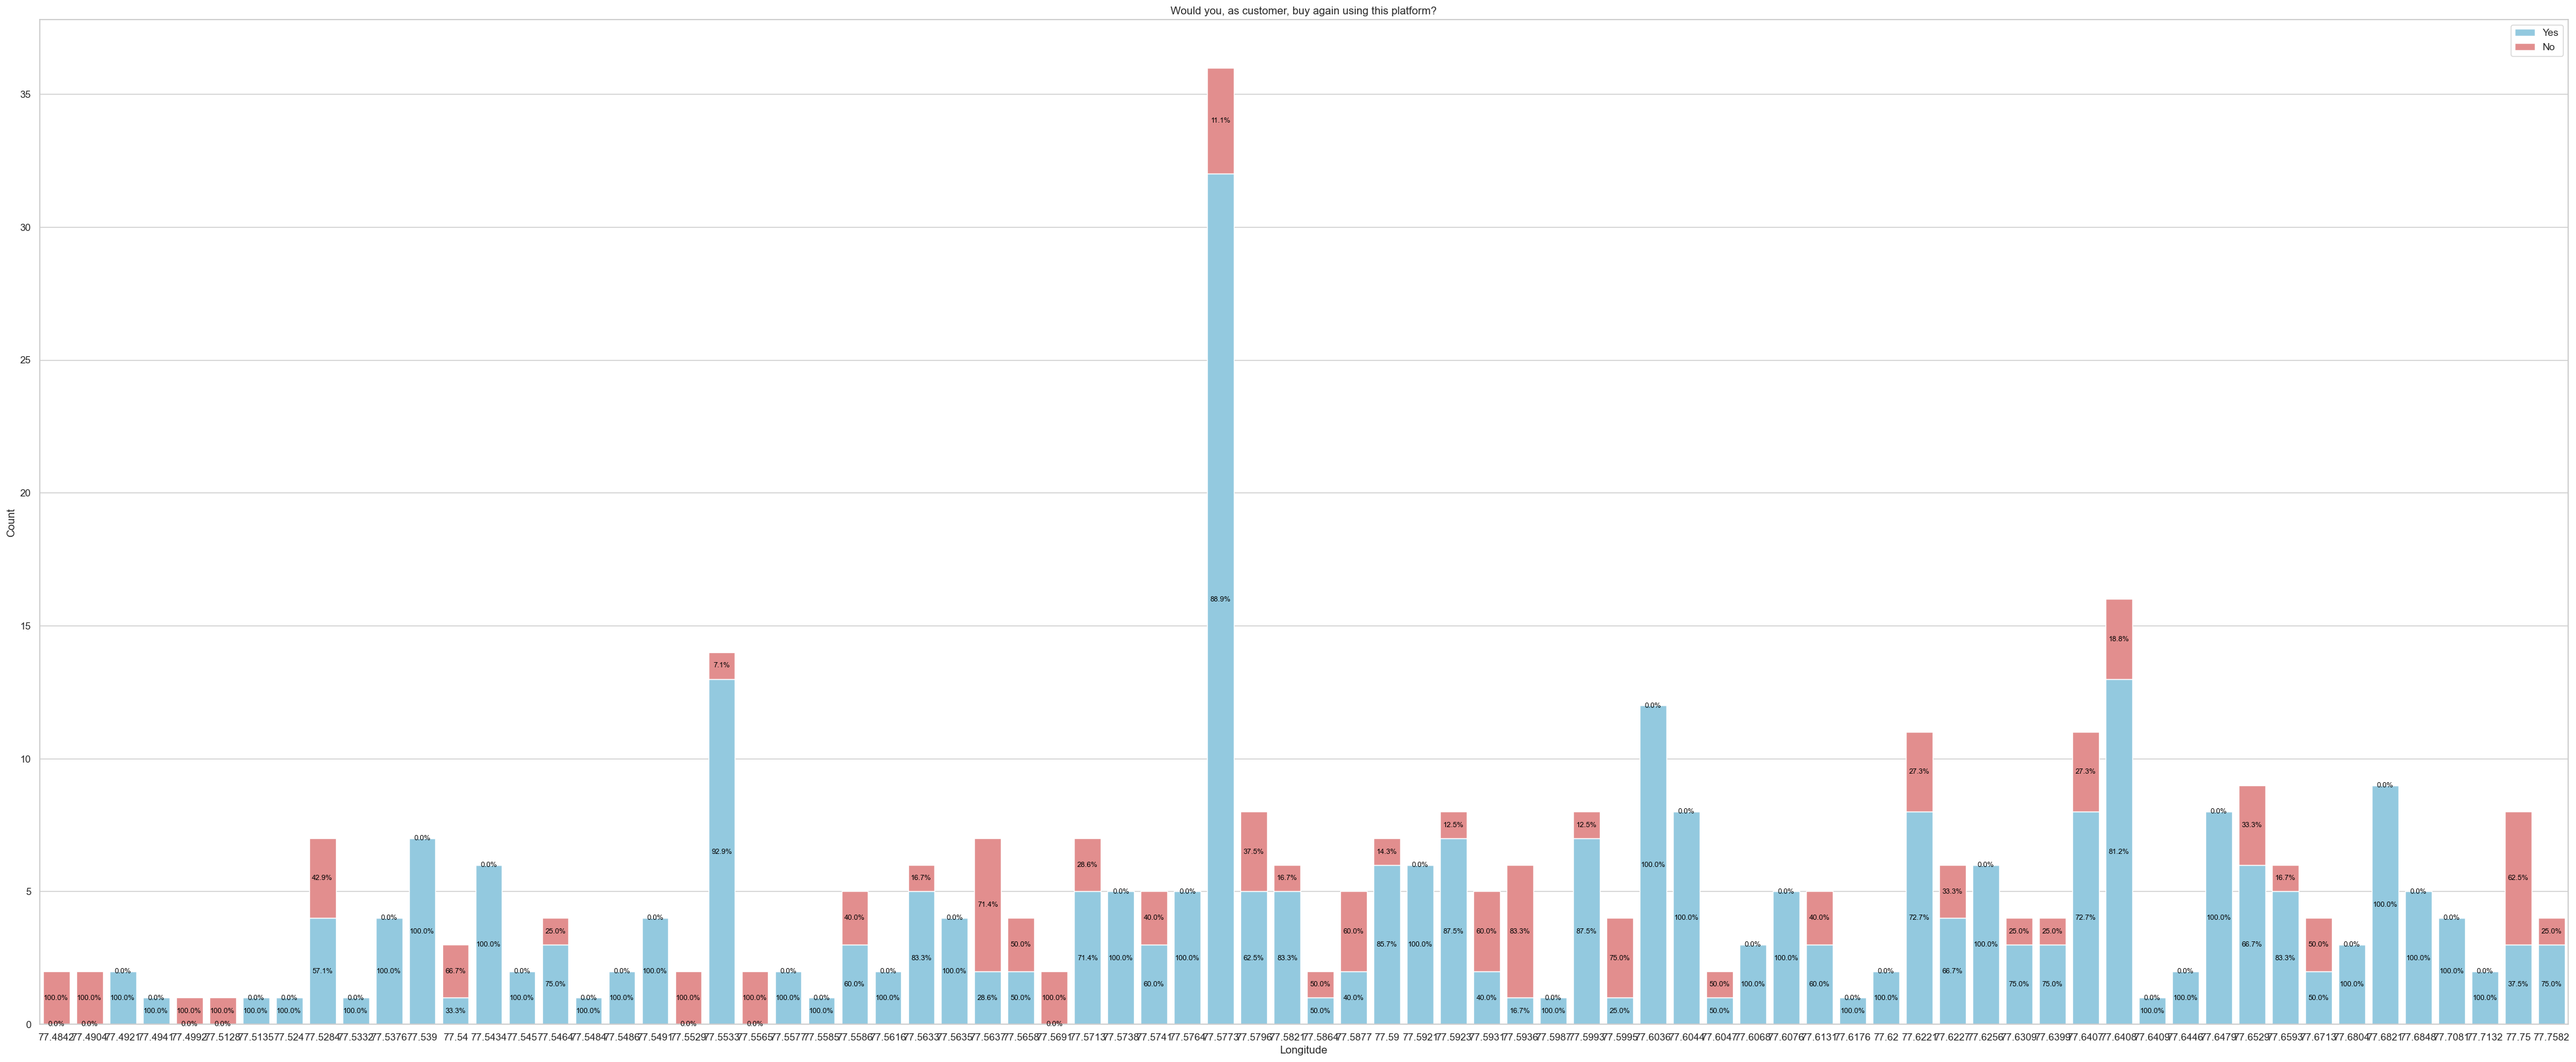

Output     0.0  1.0
longitude          
77.4842      2    0
77.4904      2    0
77.4921      0    2
77.4941      0    1
77.4992      1    0
...        ...  ...
77.6848      0    5
77.7081      0    4
77.7132      0    2
77.7500      5    3
77.7582      1    3

[76 rows x 2 columns]


In [17]:
# Column chart relating Longitude with Output:

pivot_df = new_df.pivot_table(index='longitude', columns='Output', aggfunc='size', fill_value=0)

percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(50, 20))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Longitude')
plt.ylabel('Count')
plt.title('Would you, as customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

In [140]:
pivot_df.to_csv("/Users/goncalolazaro/Desktop/longitude.csv")

# Conclusions to take off of the chart above:

- As the longitudes increase, there is a slight increase in the % of customers that self-identify as ones that would buy again using the platform the dataset refers to
- Indeed, the 26 lowest-longitudes places combine for a 76% of customers that would buy again
- The next-highest 25 longitudes combine again for a 76% of customers that would buy again
- And the highest batch of 25 longitudes combine for an 81% of customers that would buy again
- The platform needs to figure out how to improve its retaining of customers in lower-longitudes

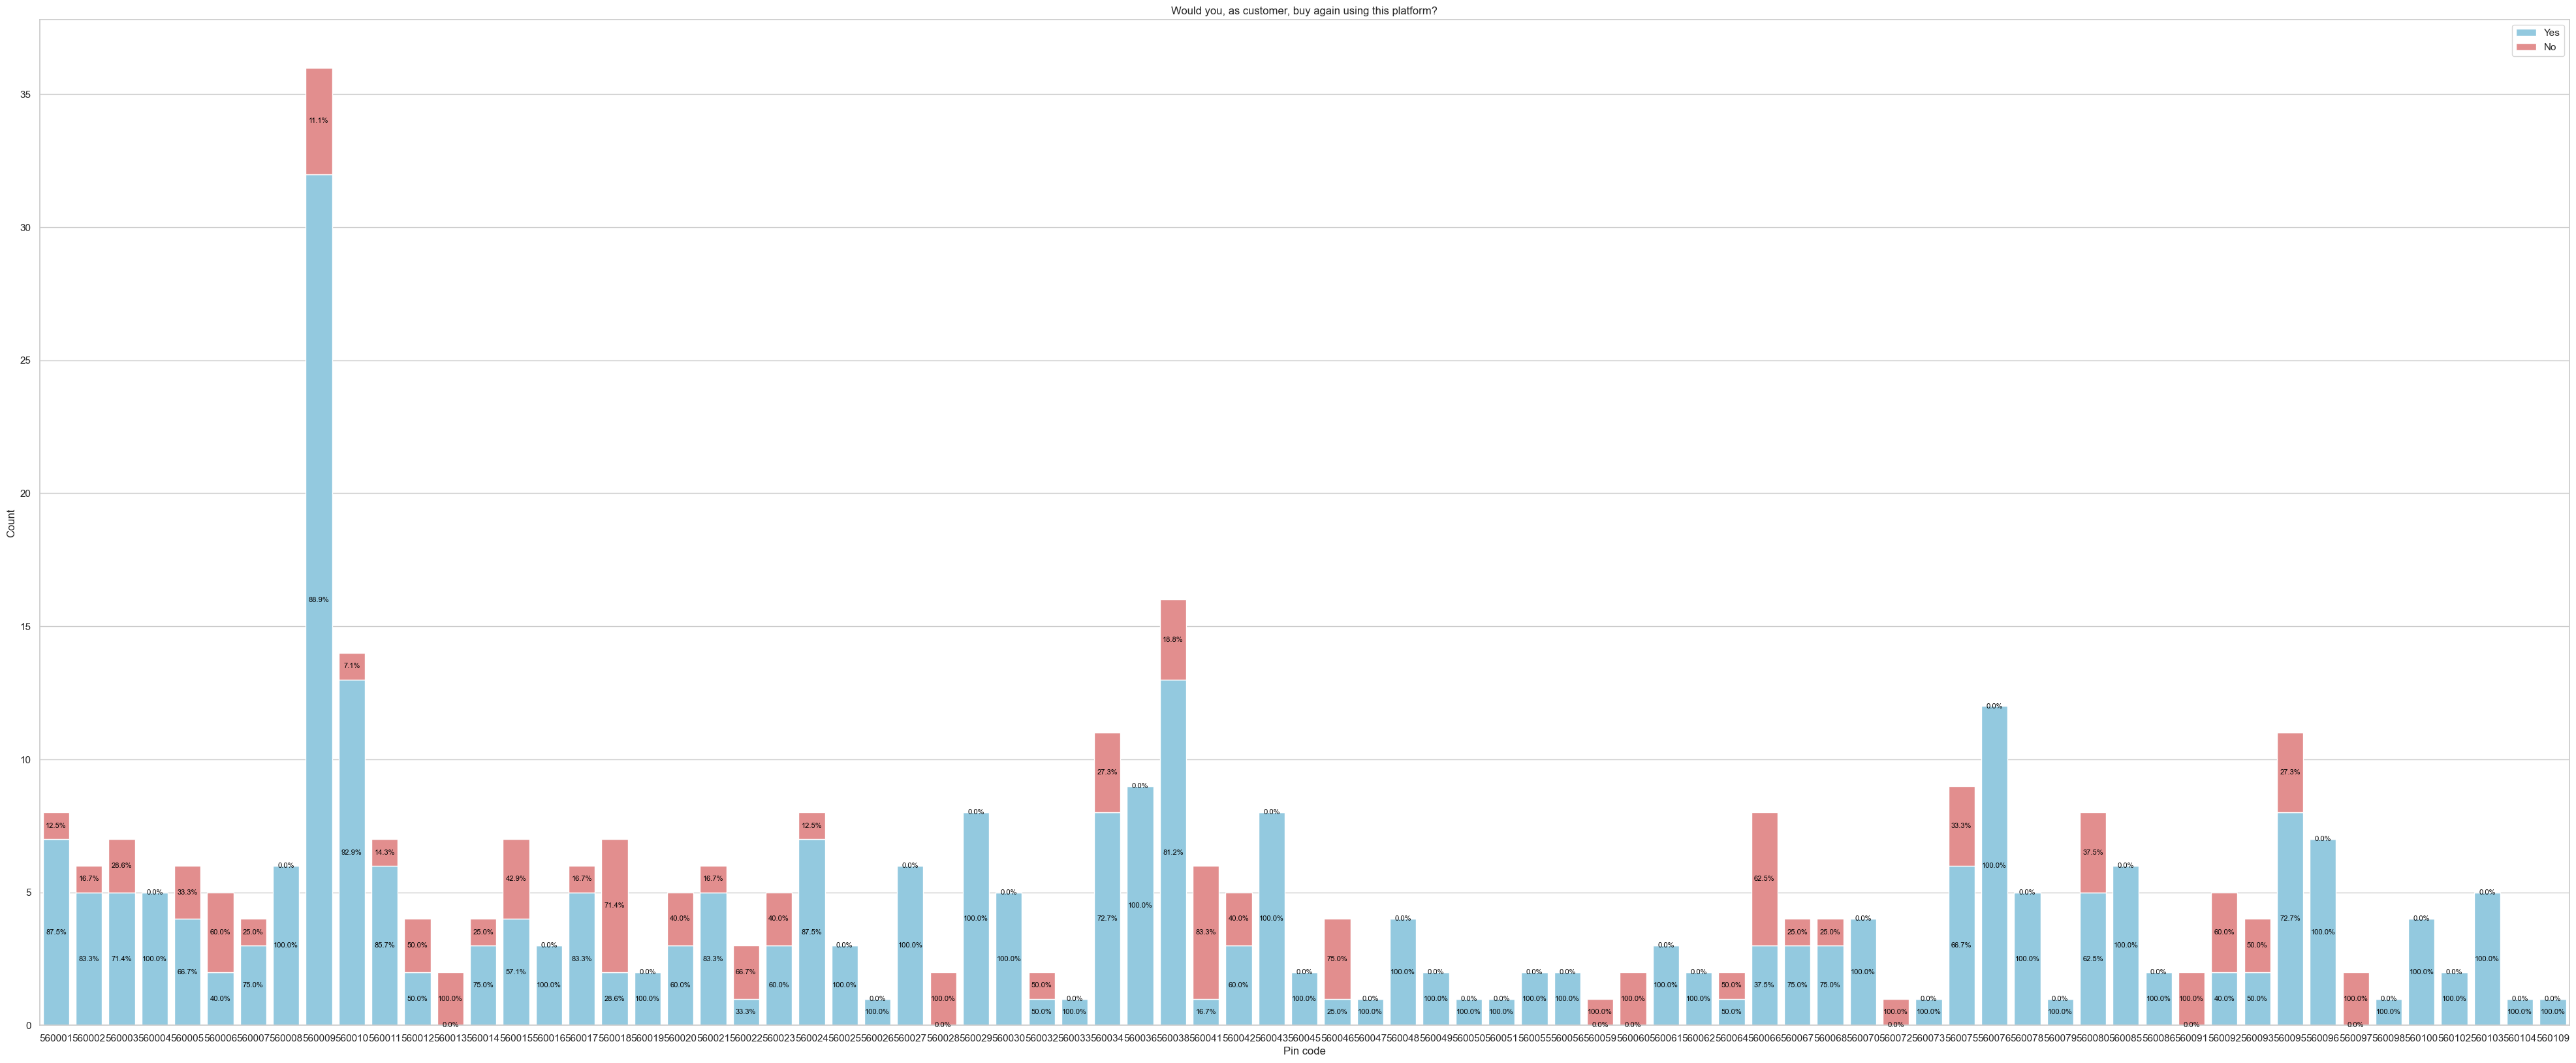

Output    0.0  1.0
Pin code          
560001      1    7
560002      1    5
560003      2    5
560004      0    5
560005      2    4
...       ...  ...
560100      0    4
560102      0    2
560103      0    5
560104      0    1
560109      0    1

[77 rows x 2 columns]


In [18]:
# Column chart relating pincode with Output:

pivot_df = new_df.pivot_table(index='Pin code', columns='Output', aggfunc='size', fill_value=0)

percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(50, 20))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Pin code')
plt.ylabel('Count')
plt.title('Would you, as customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

In [19]:
pivot_df.to_csv("/Users/goncalolazaro/Desktop/pincode.csv")

# Conclusions to take off of the chart above:

- The percentage of customers who would buy again is rather stable across the increase in pincode (78% for the 26 lowest pincodes, 79% for the next-highest 26 pincodes, 76% for the remainder)
- No need for any action on the back of this chart

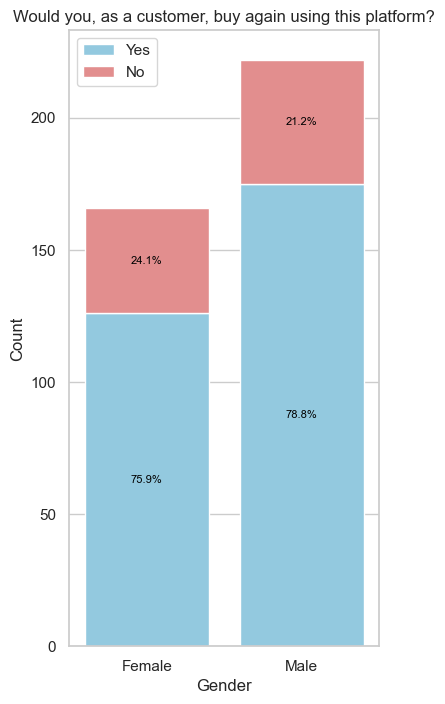

Output  0.0  1.0
Gender          
Female   40  126
Male     47  175


In [19]:
# Column chart relating Gender with Output:

pivot_df = df.pivot_table(index='Gender', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(4, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)


# Conclusions to take off of the chart above:

- The percentage of customers who would buy again is rather stable across Genders (76% for females, 79% for males)
- No need for any action on the back of this chart

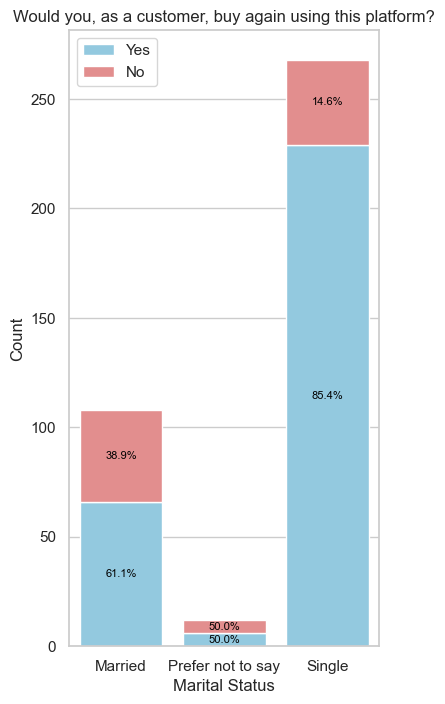

Output             0.0  1.0
Marital Status             
Married             42   66
Prefer not to say    6    6
Single              39  229


In [20]:
# Column chart relating Marital Status with Output:

pivot_df = df.pivot_table(index='Marital Status', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(4, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- There is a much lower percentage of customers that would buy again in the Married category (61%) than on the Single category (85%)
- The company should surely action on the 'Married' category (and the 'Prefer not to say' is too small to be of much relevance in actions of improvement)

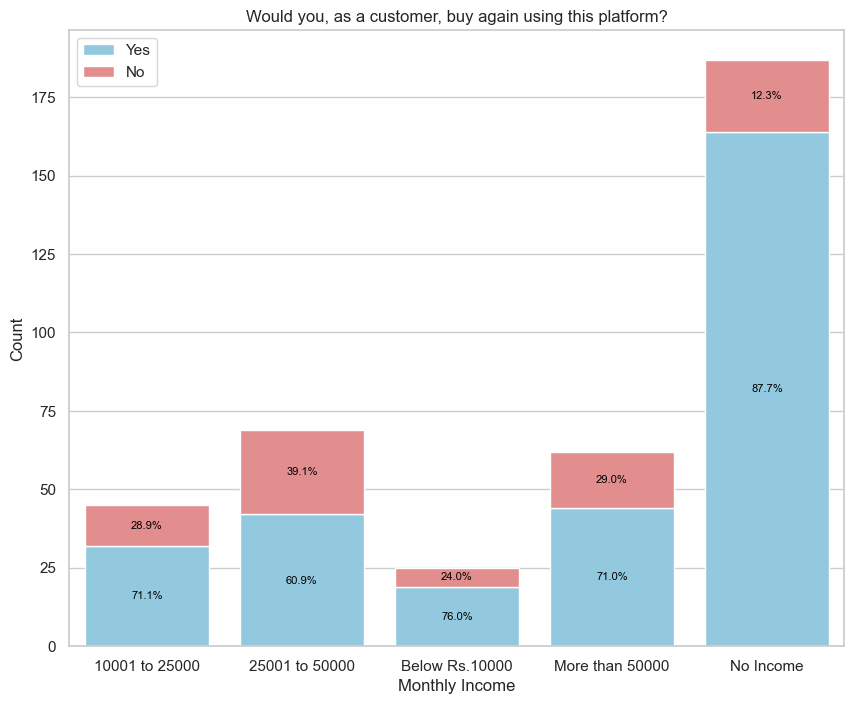

Output           0.0  1.0
Monthly Income           
10001 to 25000    13   32
25001 to 50000    27   42
Below Rs.10000     6   19
More than 50000   18   44
No Income         23  164


In [21]:
# Column chart relating Monthly Income with Output:

pivot_df = df.pivot_table(index='Monthly Income', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- Customers with no income rank the best as far as retention (88% would buy again). All the other categories have a much worse performance and the platform should act on those.

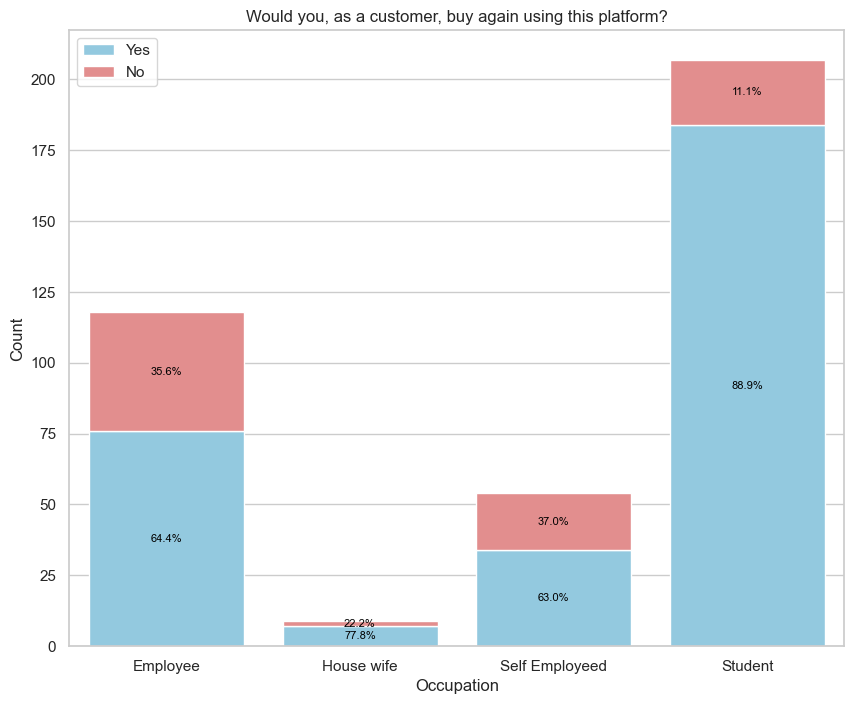

Output          0.0  1.0
Occupation              
Employee         42   76
House wife        2    7
Self Employeed   20   34
Student          23  184


In [22]:
# Column chart relating Occupation with Output:

pivot_df = df.pivot_table(index='Occupation', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- Much like the 'Monthly Income' chart, in this chart there is one category that clearly performs better than the remaining ones, and that is Student (89% would buy again)
- The platform should act to improve the remaining 3 categories

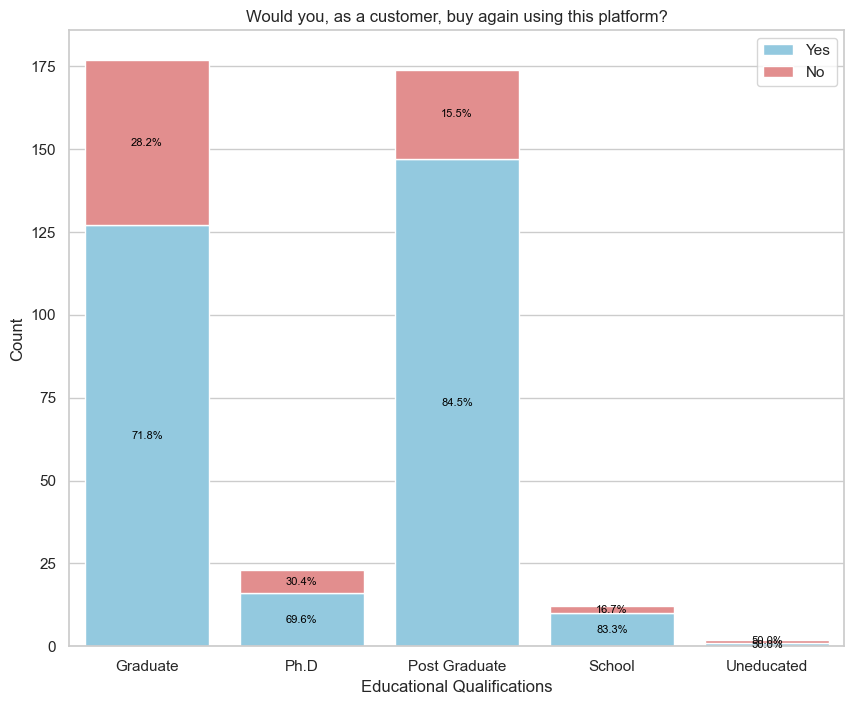

Output                      0.0  1.0
Educational Qualifications          
Graduate                     50  127
Ph.D                          7   16
Post Graduate                27  147
School                        2   10
Uneducated                    1    1


In [23]:
# Column chart relating Educational Qualifications with Output:

pivot_df = df.pivot_table(index='Educational Qualifications', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

# Conclusions to take off of the chart above:

- The Post Graduate category performs the best (83% of customers would buy again), followed by School (83% would buy again), then Graduate (72%), then PhD (70%) and then Uneducated (50%)
- Again, platform should act on lowest-performing categories

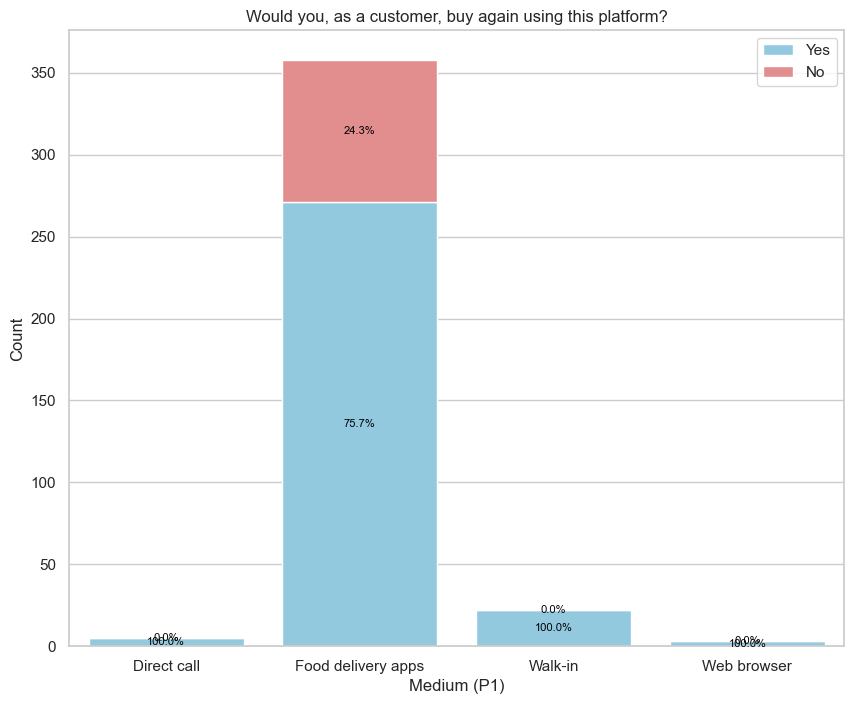

Output              0.0  1.0
Medium (P1)                 
Direct call           0    5
Food delivery apps   87  271
Walk-in               0   22
Web browser           0    3


In [24]:
# Column chart relating Medium (P1) with Output:

pivot_df = df.pivot_table(index='Medium (P1)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Medium (P1)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

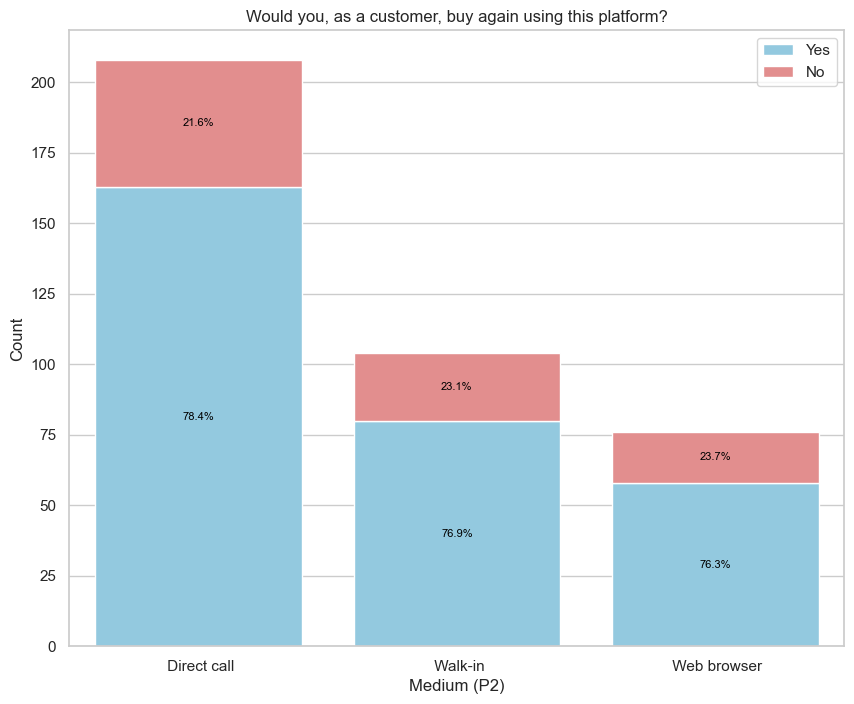

Output        0.0  1.0
Medium (P2)           
 Direct call   45  163
 Walk-in       24   80
 Web browser   18   58


In [25]:
# Column chart relating Medium (P2) with Output:

pivot_df = df.pivot_table(index='Medium (P2)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Medium (P2)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

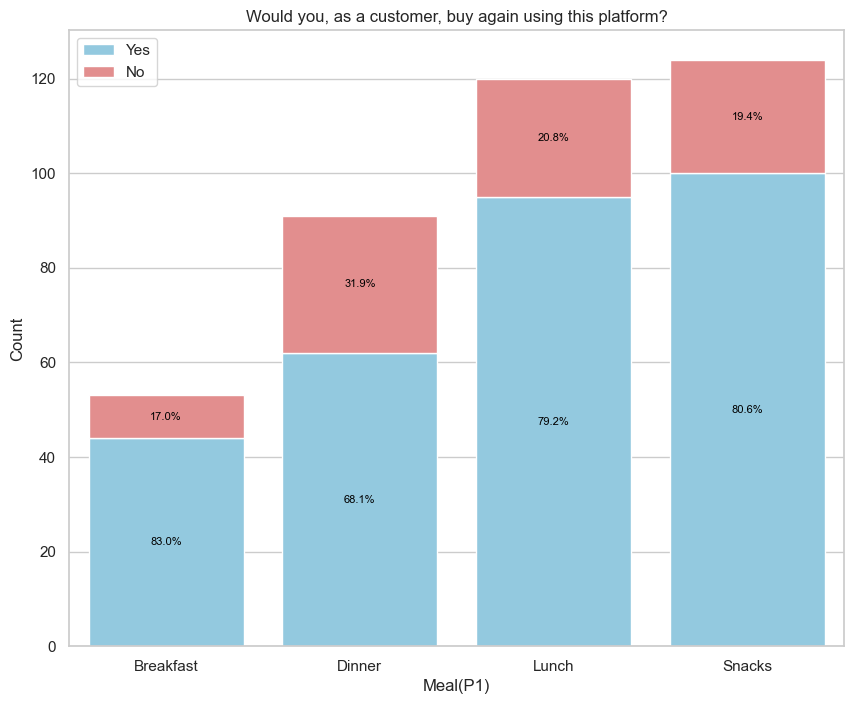

Output     0.0  1.0
Meal(P1)           
Breakfast    9   44
Dinner      29   62
Lunch       25   95
Snacks      24  100


In [26]:
# Column chart relating Meal(P1) with Output:

pivot_df = df.pivot_table(index='Meal(P1)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Meal(P1)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

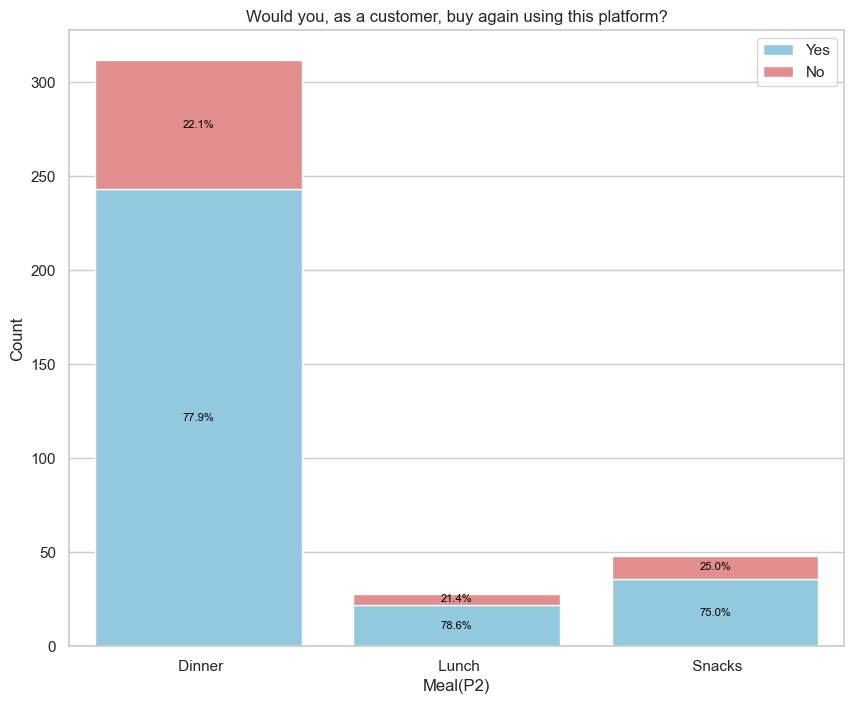

Output    0.0  1.0
Meal(P2)          
 Dinner    69  243
 Lunch      6   22
 Snacks    12   36


In [27]:
# Column chart relating Meal(P2) with Output:

pivot_df = df.pivot_table(index='Meal(P2)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Meal(P2)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

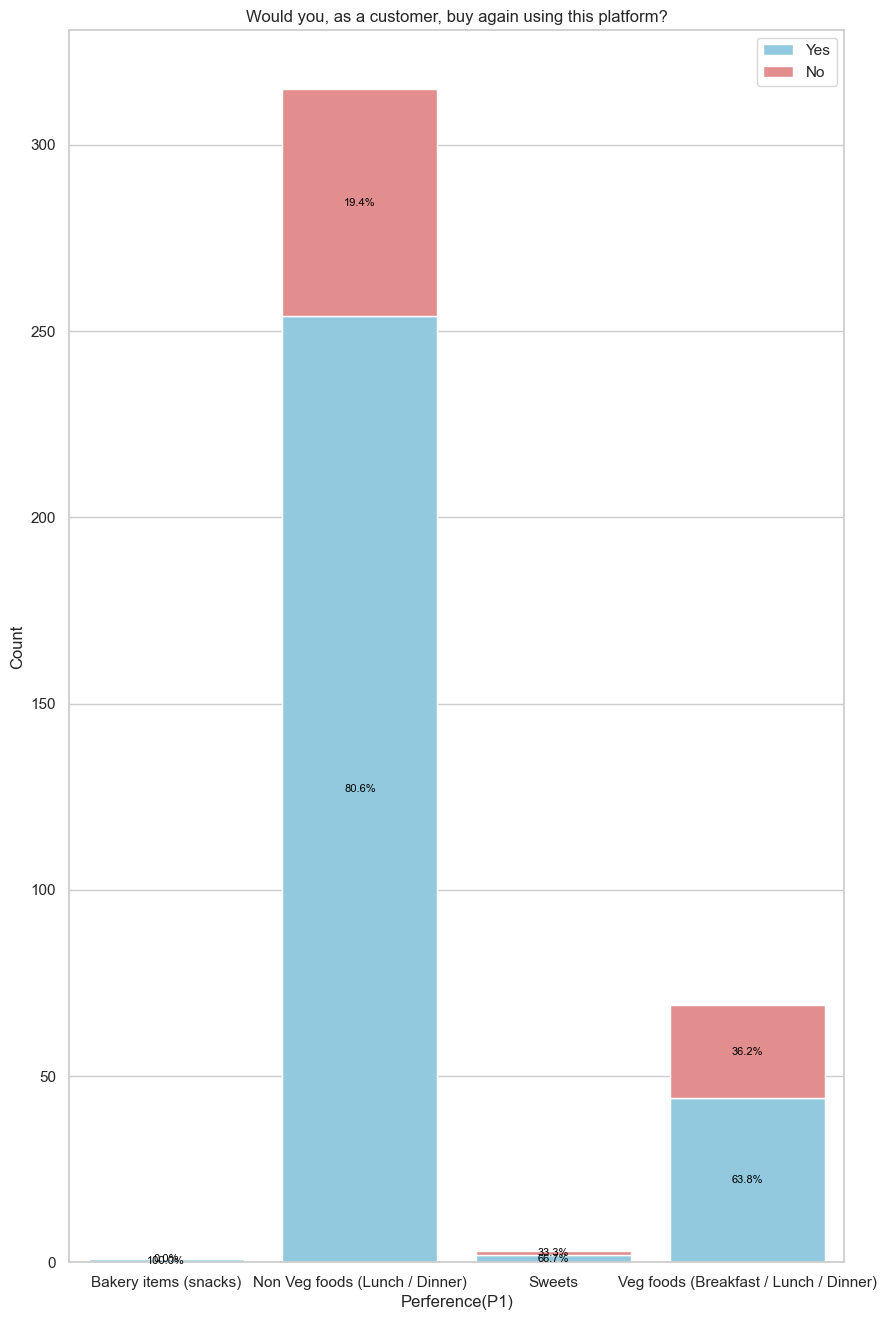

Output                                  0.0  1.0
Perference(P1)                                  
Bakery items (snacks)                     0    1
Non Veg foods (Lunch / Dinner)           61  254
Sweets                                    1    2
Veg foods (Breakfast / Lunch / Dinner)   25   44


In [28]:
# Column chart relating Perference(P1) with Output:

pivot_df = df.pivot_table(index='Perference(P1)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 16))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Perference(P1)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

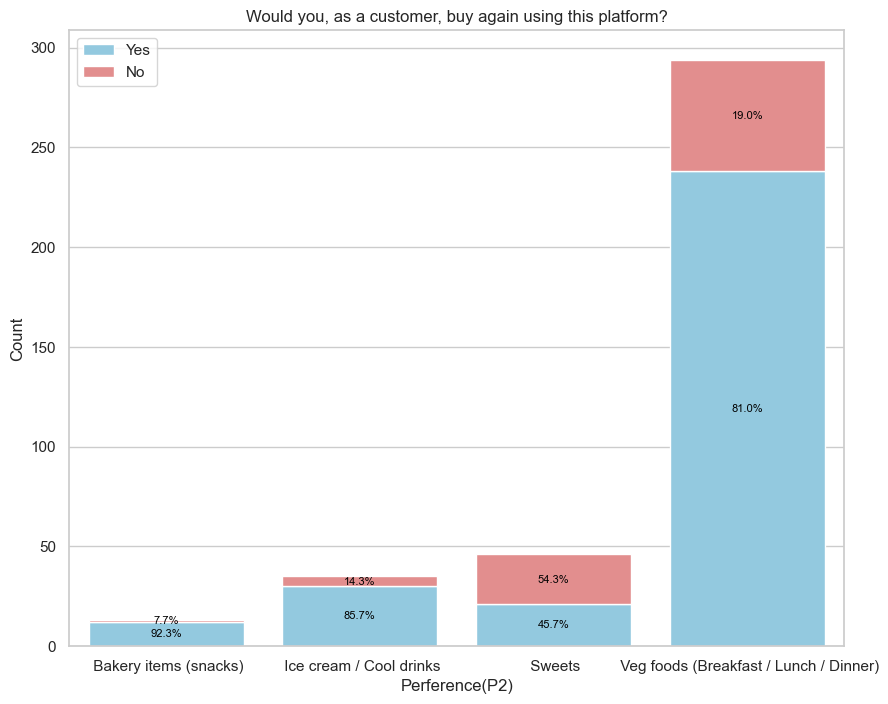

Output                                   0.0  1.0
Perference(P2)                                   
 Bakery items (snacks)                     1   12
 Ice cream / Cool drinks                   5   30
 Sweets                                   25   21
 Veg foods (Breakfast / Lunch / Dinner)   56  238


In [29]:
# Column chart relating Perference(P2) with Output:

pivot_df = df.pivot_table(index='Perference(P2)', columns='Output', aggfunc='size', fill_value=0)
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

bars = sns.barplot(x=pivot_df.index, y=pivot_df[1.0], color='skyblue', label='Yes')
sns.barplot(x=pivot_df.index, y=pivot_df[0.0], color='lightcoral', bottom=pivot_df[1.0], label='No', ax=bars)

for i, (yes_percentage, no_percentage) in enumerate(zip(percentage_df[1.0], percentage_df[0.0])):
    bar_center_x = bars.patches[i].get_x() + bars.patches[i].get_width() / 2
    plt.text(bar_center_x, bars.patches[i].get_height() / 2, f'{yes_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(bar_center_x, bars.patches[i].get_height() + pivot_df[0.0].values[i] / 2, f'{no_percentage:.1f}%', ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Perference(P2)')
plt.ylabel('Count')
plt.title('Would you, as a customer, buy again using this platform?')
plt.legend()
plt.show()

print(pivot_df)

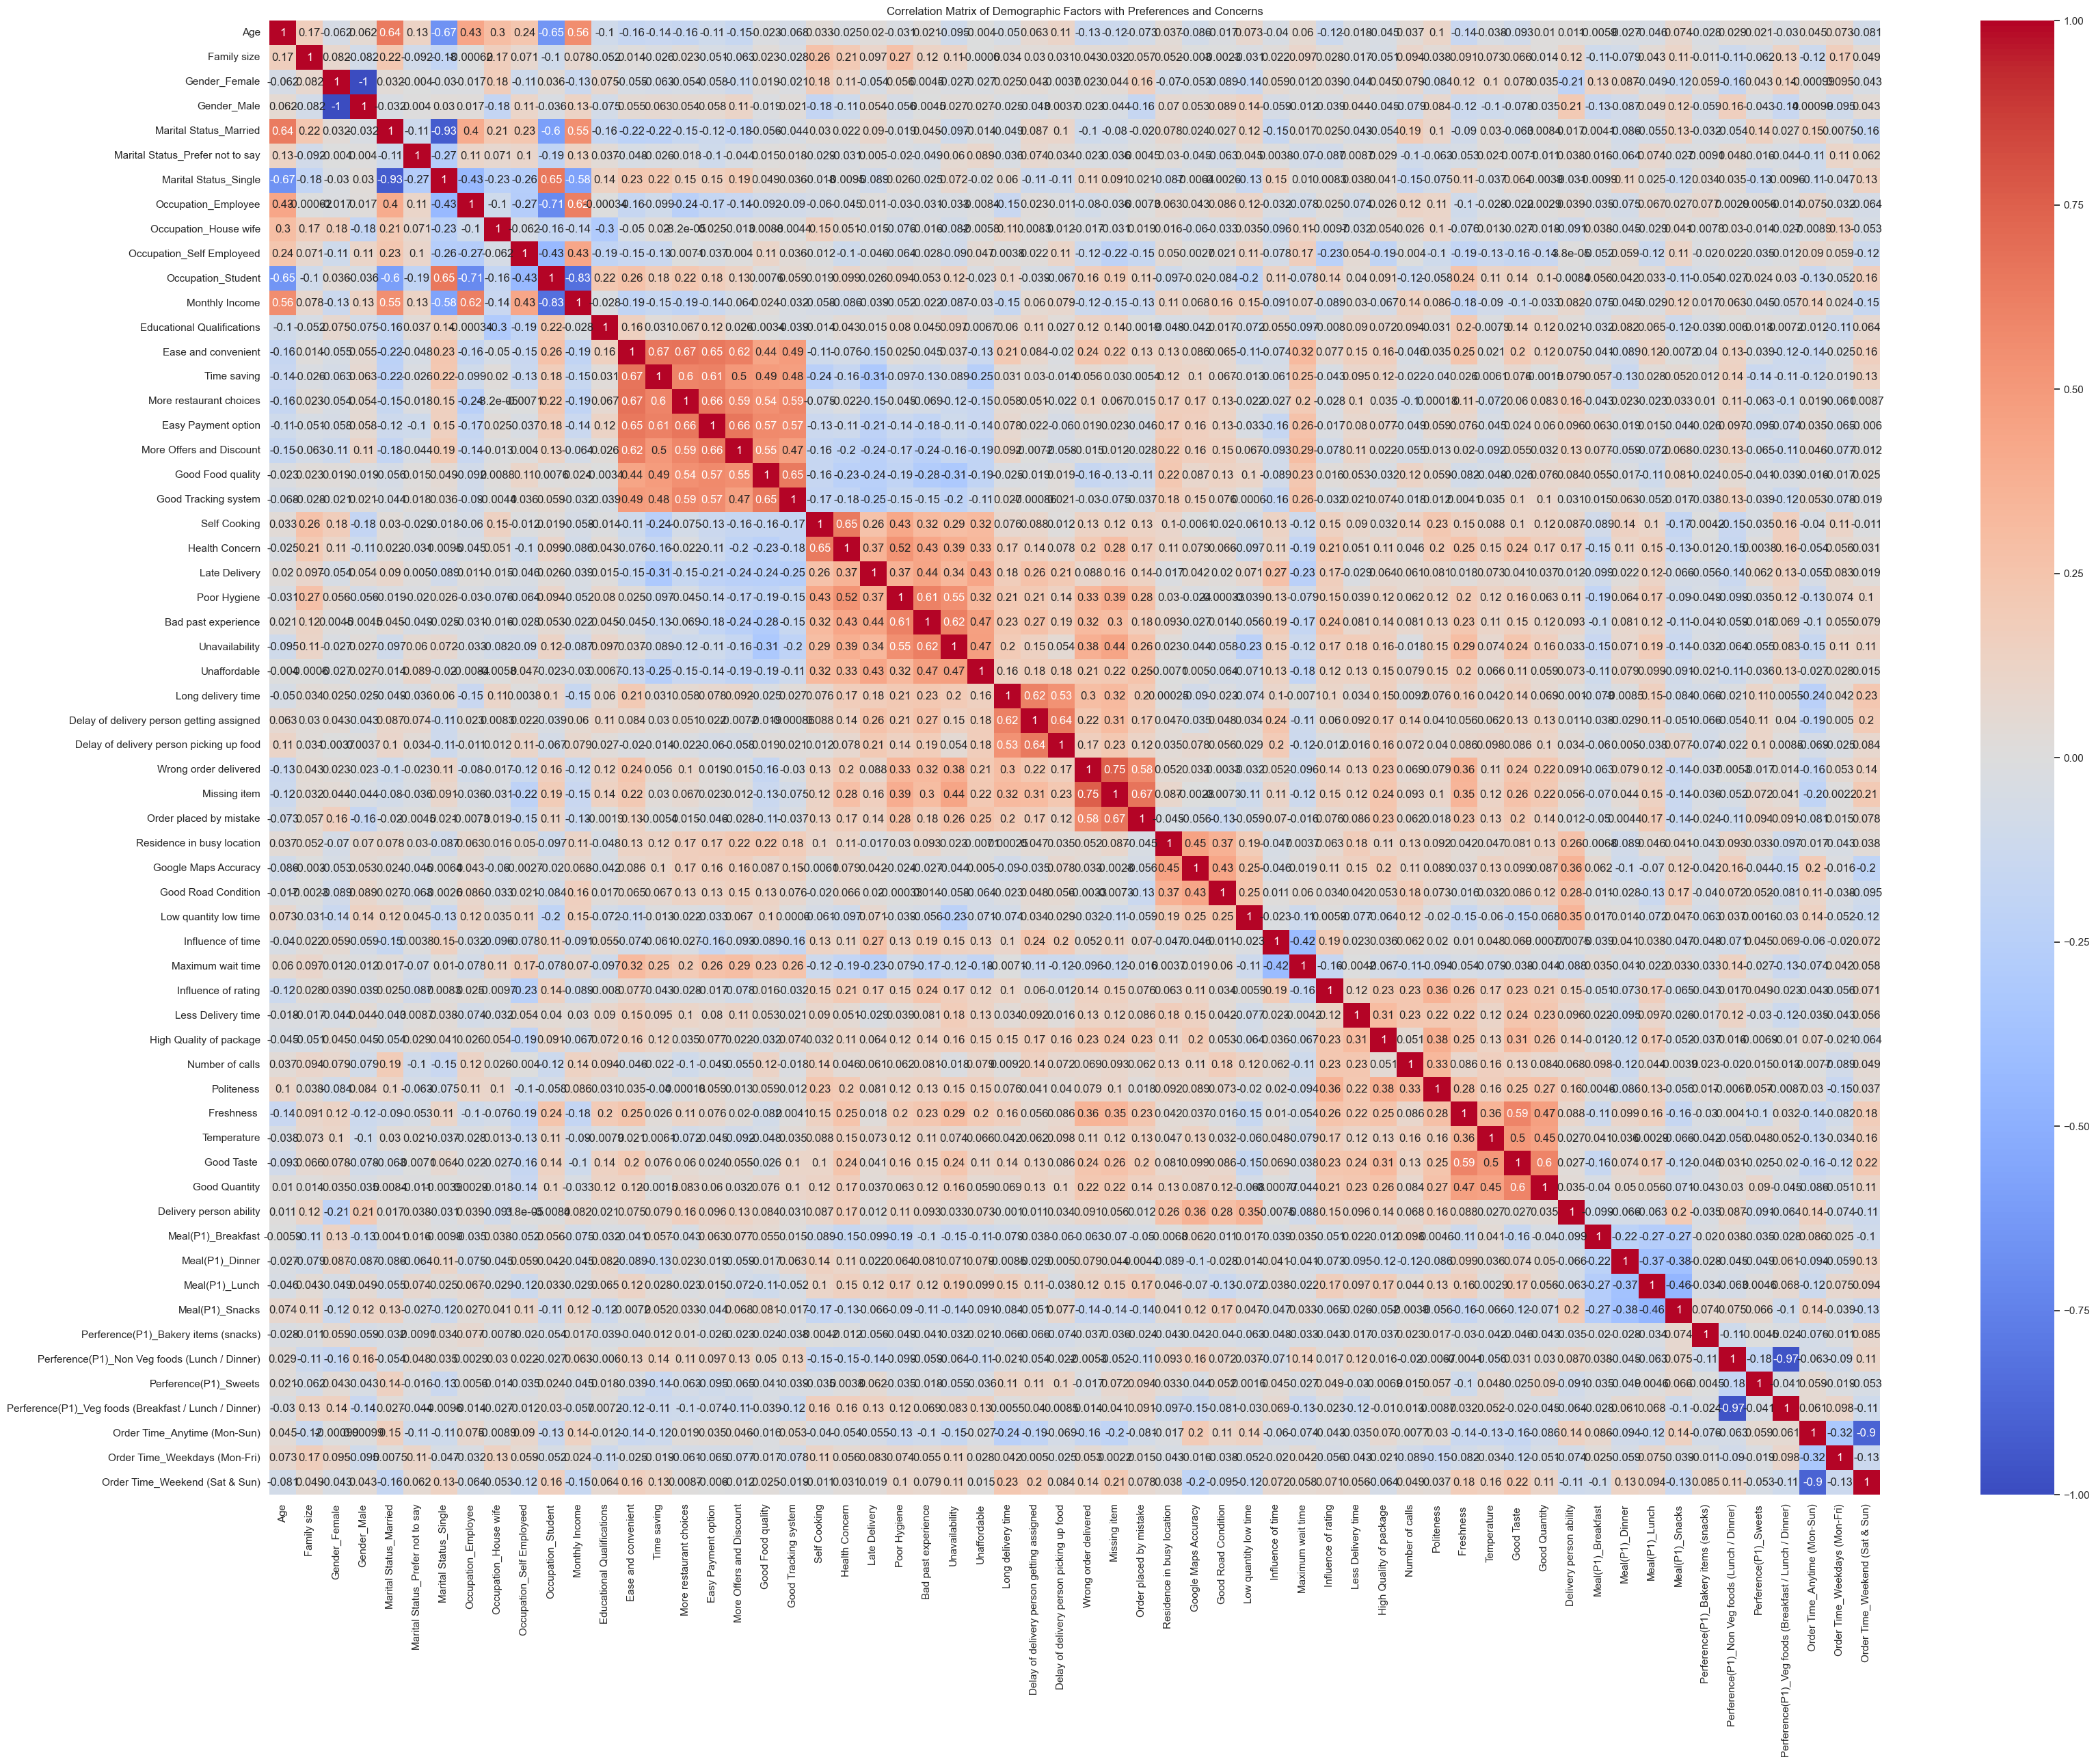

In [30]:
correlation_df = new_df[demographic_columns + features_of_interest].copy()

# Apply the mapping to the columns in correlation_df
for col in non_numeric_columns:
    if col in mapping:
        correlation_df[col] = correlation_df[col].map(mapping[col])

# Calculate correlation matrix
corr_matrix = correlation_df.corr()

# Plotting heatmap
plt.figure(figsize=(38, 28))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Demographic Factors with Preferences and Concerns')
plt.show()

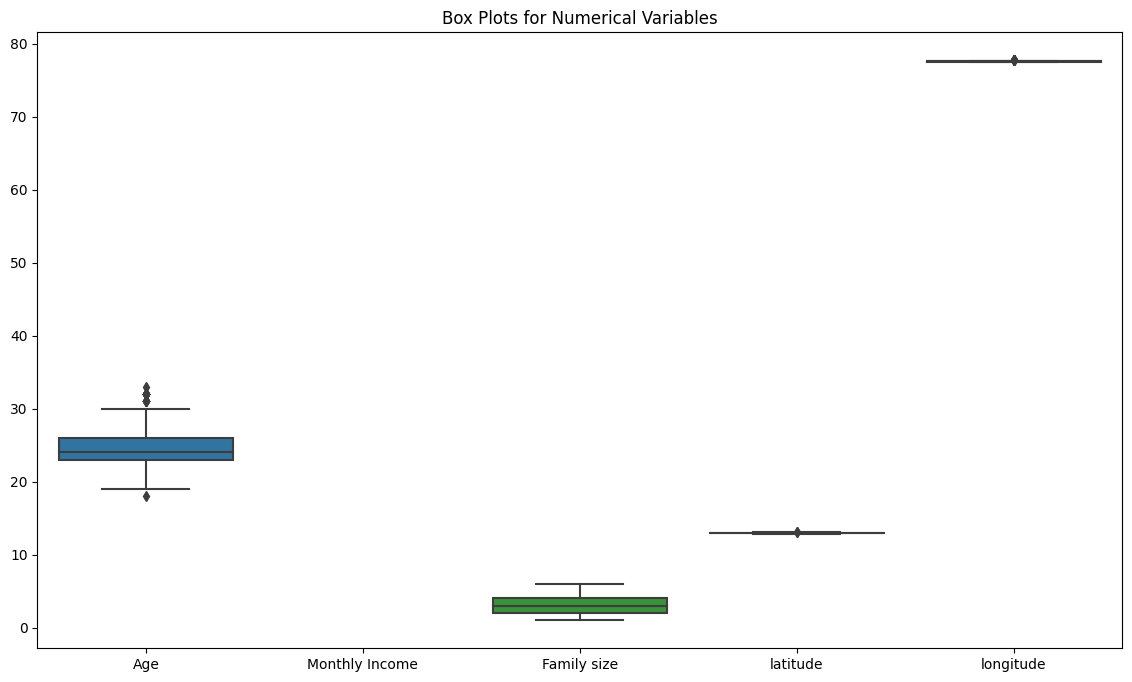

In [15]:
numerical_columns = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude']
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_df[numerical_columns])
plt.title('Box Plots for Numerical Variables')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [16]:
# Define features (X) and target variable (y)
X = new_df.drop('Output', axis=1)
y = new_df['Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=100000)  # Increased max_iter for convergence

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features, adjust as needed

# Fit RFE
fit = rfe.fit(X_train, y_train)

# Print ranking of features (1: selected, 2: not selected)
print("Feature Ranking:", fit.ranking_)

# Get selected features
selected_features = X_train.columns[fit.support_]
print("Selected Features:", selected_features)

# Train a logistic regression model on the selected features
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Feature Ranking: [54 30 29 42 37 65 71 55  1 19 45  7 15 16 46 36 47  1 41 13 48 10 23 14
 33 40 31 18 32 53 21 56 50 20 38 17 12 28 22  3 70 25 39 52 61 60 34  8
 35 27 69 26  1 66  1  2 67 74 64 63 44  6 57 51 58 68 11 73 43 72 49 59
  9  1 24  5 62  4]
Selected Features: Index(['Ease and convenient', 'Late Delivery', 'Occupation_Student',
       'Medium (P1)_Food delivery apps', 'Perference(P2)_ Sweets'],
      dtype='object')
Accuracy: 0.9358974358974359
Precision: 0.9420289855072463
Recall: 0.9848484848484849
F1 Score: 0.962962962962963
Confusion Matrix:
 [[ 8  4]
 [ 1 65]]
